# About The DataSet

The project aims to predict the number of wins for a MLB team in 2015 based on 16 features from 2014 data. The features include W, R, AB, H, and 2B, which are statistics related to pitching, scoring, batting, and hitting. The output is a numerical value of wins.The features also include 3B, HR, BB, SO, and SB, which are statistics related to hitting, walking, striking out, and stealing bases. Another feature is RA, which measures the rate of runs allowed or scored.The features also include ER, ERA, CG, SHO, and SV, which are statistics related to runs allowed, pitching performance, and game completion. These features indicate how well a pitcher can prevent the opposing team from scoring.The last feature is E, which measures the number of errors committed by the fielders that allow the offense to gain an advantage. The output is the number of predicted wins (W) for a team in 2015 based on these features. For more details on baseball statistics, you can visit this link: https://en.wikipedia.org/wiki/Baseball_statistics

# Importing The Libraries

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv('baseball.csv')

In [21]:
df.head()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

The data has 5 rows and 17 columns, showing the input features related to offense, defense, and pitching, and the output of predicted wins.The input features are statistics related to scoring, batting, and stealing bases. The output is the number of predicted wins, which depends on the pitcher’s performance.

In [22]:
df

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   
12   85  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   
13   76  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   
14   68  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   
15  100  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   
16   98  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   
17   97  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   
18   68  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1   
19   64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   
20   90  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   
21   83  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   
22   71  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   
23   67  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   
24   63  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1   
25   92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26   84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27   79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28   74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29   68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV    E  
0     8  56   88  
1    12  45   86  
2    10  38   79  
3     9  37  101  
4    12  35   86  
5    10  34   88  
6     4  48   93  
7    10  43   77  
8    12  60   95  
9    10  40   97  
10    9  45  119  
11   13  39   85  
12   12  46   93  
13   12  45   94  
14   15  28  126  
15   15  62   96  
16   13  54  122  
17   21  48  111  
18    7  40  116  
19    8  35   90  
20   14  50   88  
21   13  41   90  
22   12  35   77  
23   10  44   90  
24    7  35  117  
25   21  47   75  
26   18  41   78  
27   12  44   86  
28    6  41   92  
29    4  36   95

In [23]:
df.shape

(30, 17)

The data has 30 rows and 17 columns.

In [24]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

The data shows the names of all the features.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


The data has 30 records, 17 features, and no missing values. The features have different data types: one is float and 16 are integer.

In [26]:
df.isnull().sum() #checking any null values

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

The data is complete and has no missing values.

In [27]:
df.describe()

W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000   973.00000   44.000000  525.000000   
25%    23.000000  140.250000  428.250000  1157.50000   69.000000  636.250000   
50%    31.000000  158.500000  473.000000  1261.50000   83.500000  695.500000   
75%    39.000000  177.000000  501.250000  1311.50000   96.500000  732.500000   
max    49.000000  232.000000  570.000000  1518.00000  134.000000  844.000000   

               ER        ERA         CG        SHO         SV           E  
count   30.000000  30.000000  30.000000  30.000000  30.000000   30.000000  
mean   635.833333   3.956333   3.466667  11.300000  43.066667   94.333333  
std     70.140786   0.454089   2.763473   4.120177   7.869335   13.958889  
min    478.000000   2.940000   0.000000   4.000000  28.000000   75.000000  
25%    587.250000   3.682500   1.000000   9.000000  37.250000   86.000000  
50%    644.500000   4.025000   3.000000  12.000000  42.000000   91.000000  
75%    679.250000   4.220000   5.750000  13.000000  46.750000   96.750000  
max    799.000000   5.040000  11.000000  21.000000  62.000000  126.000000

The data is complete, numerical, and has different scales. Some features are not normal.

In [28]:
df.describe().T

count         mean         std      min        25%       50%      75%  \
W     30.0    80.966667   10.453455    63.00    74.0000    81.000    87.75   
R     30.0   688.233333   58.761754   573.00   651.2500   689.000   718.25   
AB    30.0  5516.266667   70.467372  5385.00  5464.0000  5510.000  5570.00   
H     30.0  1403.533333   57.140923  1324.00  1363.0000  1382.500  1451.50   
2B    30.0   274.733333   18.095405   236.00   262.2500   275.500   288.75   
3B    30.0    31.300000   10.452355    13.00    23.0000    31.000    39.00   
HR    30.0   163.633333   31.823309   100.00   140.2500   158.500   177.00   
BB    30.0   469.100000   57.053725   375.00   428.2500   473.000   501.25   
SO    30.0  1248.200000  103.759470   973.00  1157.5000  1261.500  1311.50   
SB    30.0    83.500000   22.815225    44.00    69.0000    83.500    96.50   
RA    30.0   688.233333   72.108005   525.00   636.2500   695.500   732.50   
ER    30.0   635.833333   70.140786   478.00   587.2500   644.500   679.25   
ERA   30.0     3.956333    0.454089     2.94     3.6825     4.025     4.22   
CG    30.0     3.466667    2.763473     0.00     1.0000     3.000     5.75   
SHO   30.0    11.300000    4.120177     4.00     9.0000    12.000    13.00   
SV    30.0    43.066667    7.869335    28.00    37.2500    42.000    46.75   
E     30.0    94.333333   13.958889    75.00    86.0000    91.000    96.75   

         max  
W     100.00  
R     891.00  
AB   5649.00  
H    1515.00  
2B    308.00  
3B     49.00  
HR    232.00  
BB    570.00  
SO   1518.00  
SB    134.00  
RA    844.00  
ER    799.00  
ERA     5.04  
CG     11.00  
SHO    21.00  
SV     62.00  
E     126.00

In [29]:
#The output we want to predict is W.
df.W.unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [1]:
#The goal is to use regression to estimate the number of wins for a team.

<AxesSubplot:xlabel='W', ylabel='Density'>

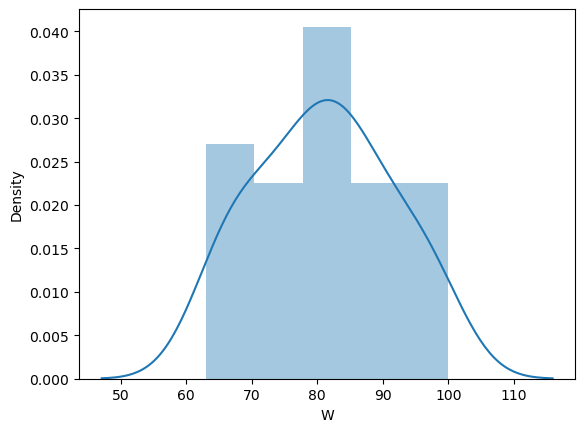

In [30]:
#Let’s start by examining the output variable.
sns.distplot(df.W)

In [2]:
#The output variable looks like it follows a normal distribution.

<AxesSubplot:xlabel='W', ylabel='Count'>

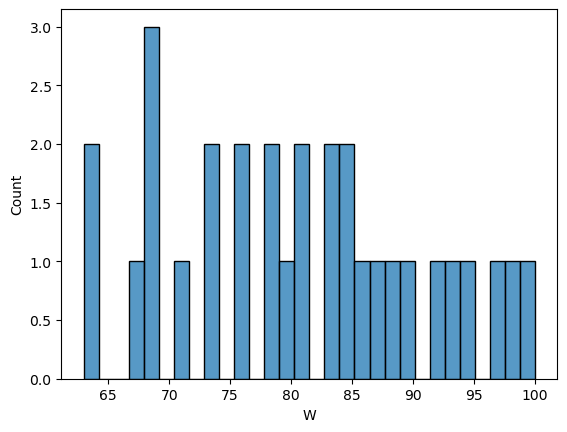

In [31]:
sns.histplot(df.W, bins=30)

In [ ]:
#The number of wins is influenced by different features, so we have to explore the correlations.

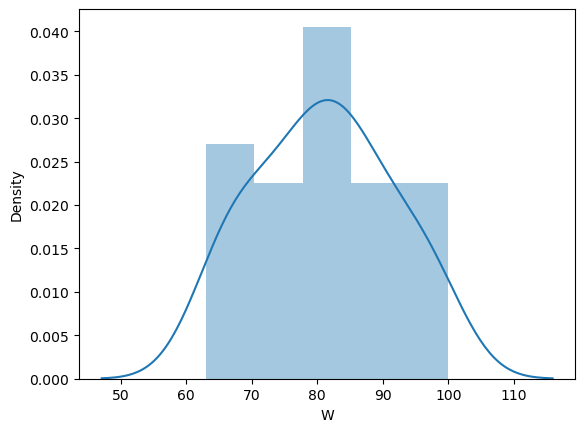

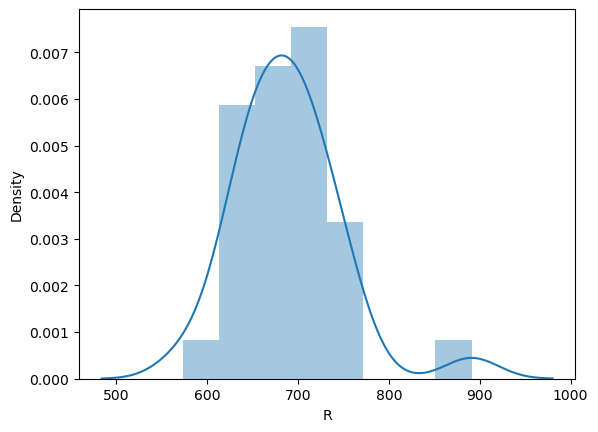

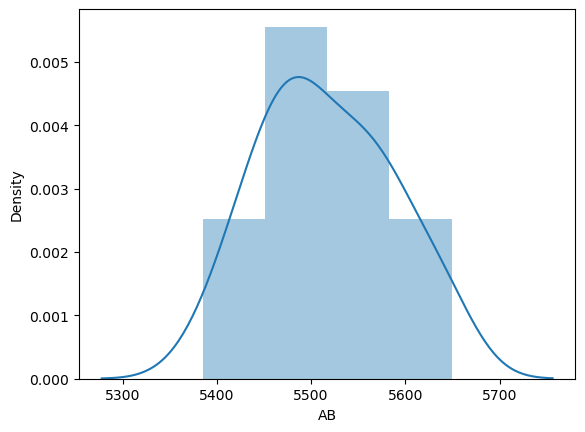

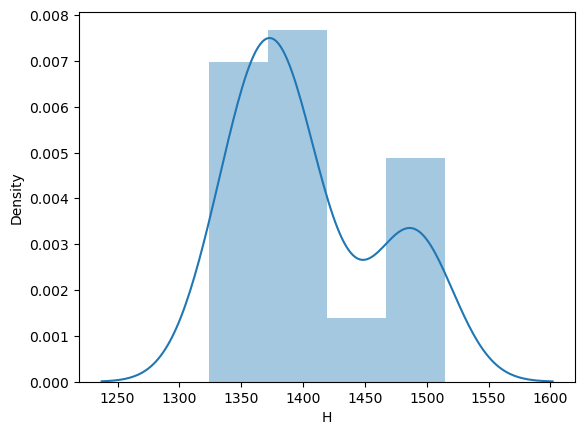

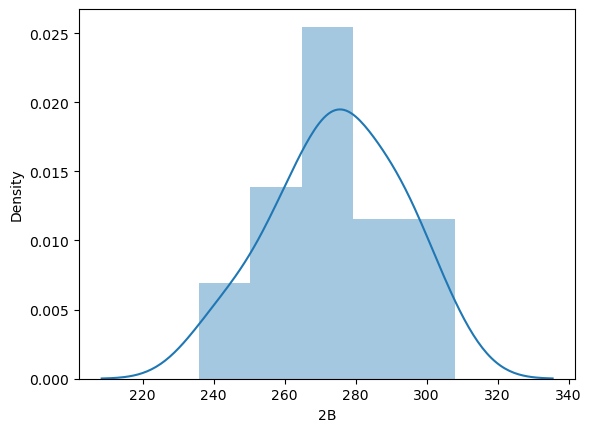

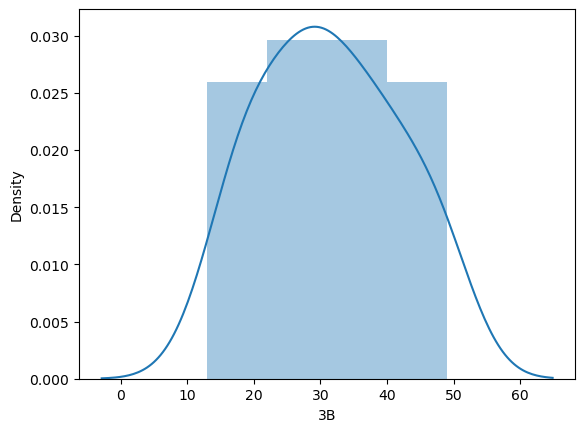

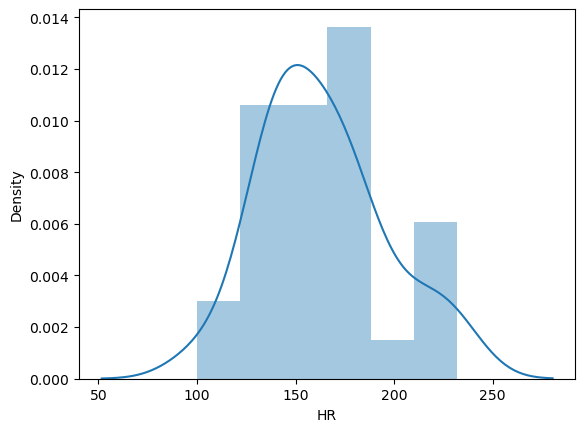

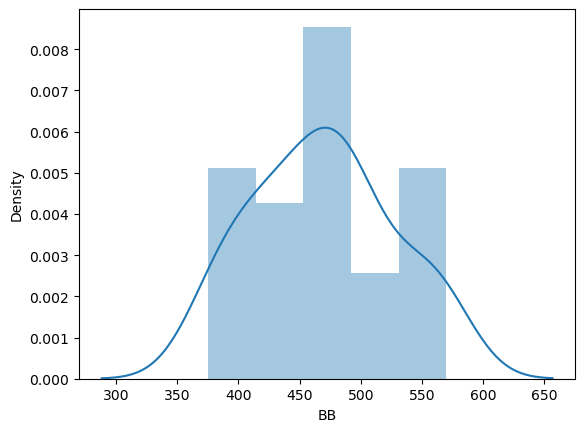

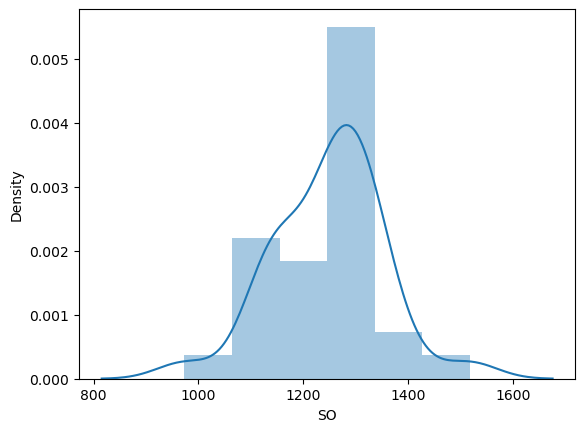

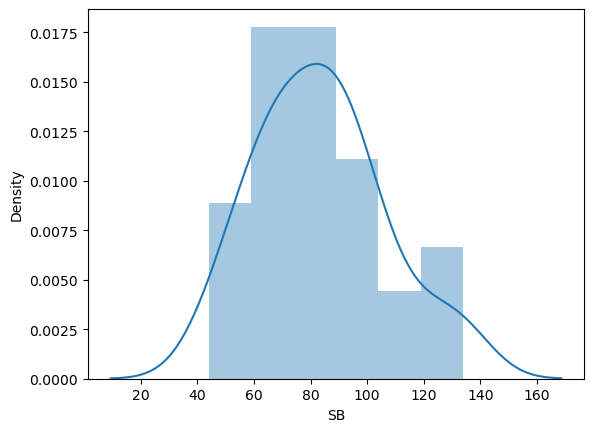

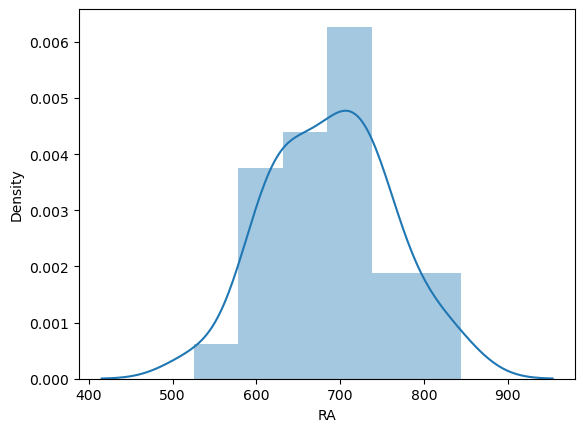

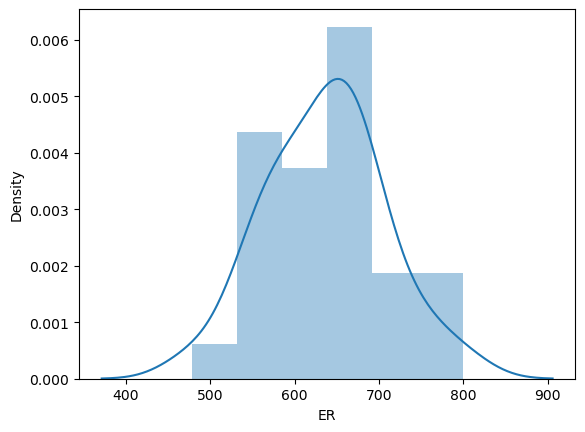

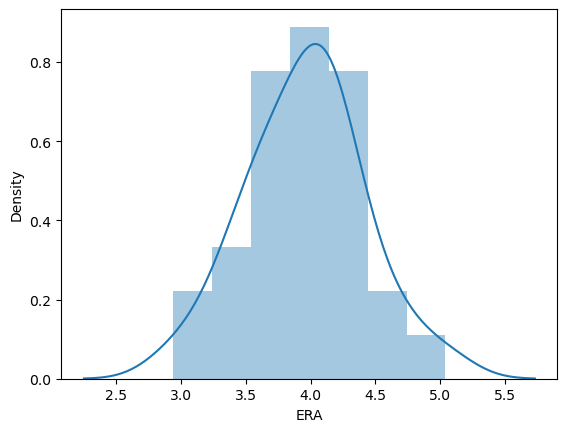

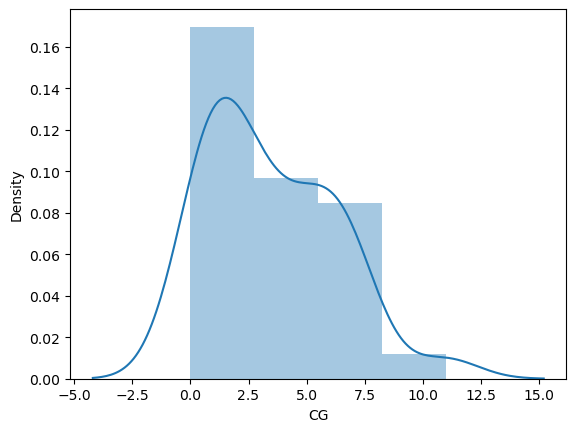

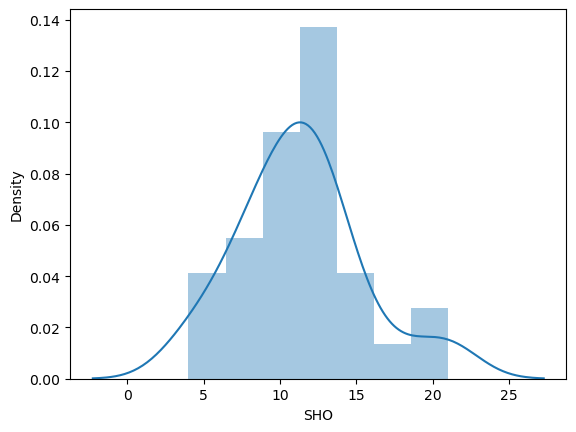

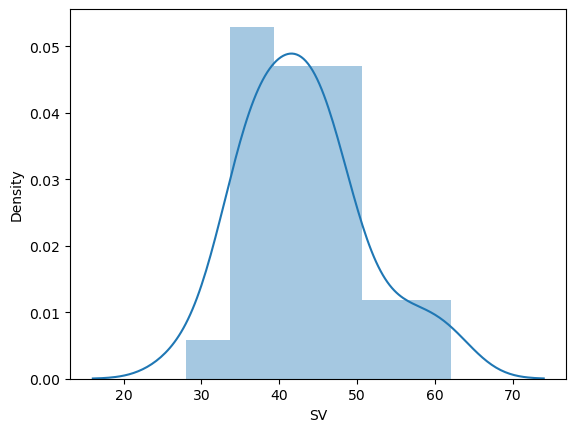

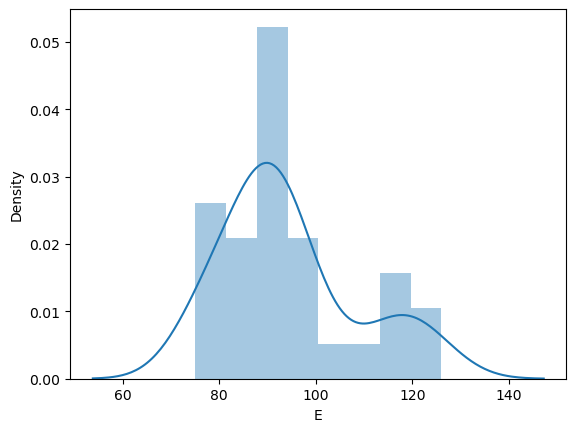

In [32]:
# Let’s begin by looking at the distribution of all the features.

for i in df.columns:
    sns.distplot(df[i])
    plt.show()

# EXPLORATORY DATA ANALYSIS(EDA)

In [33]:
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

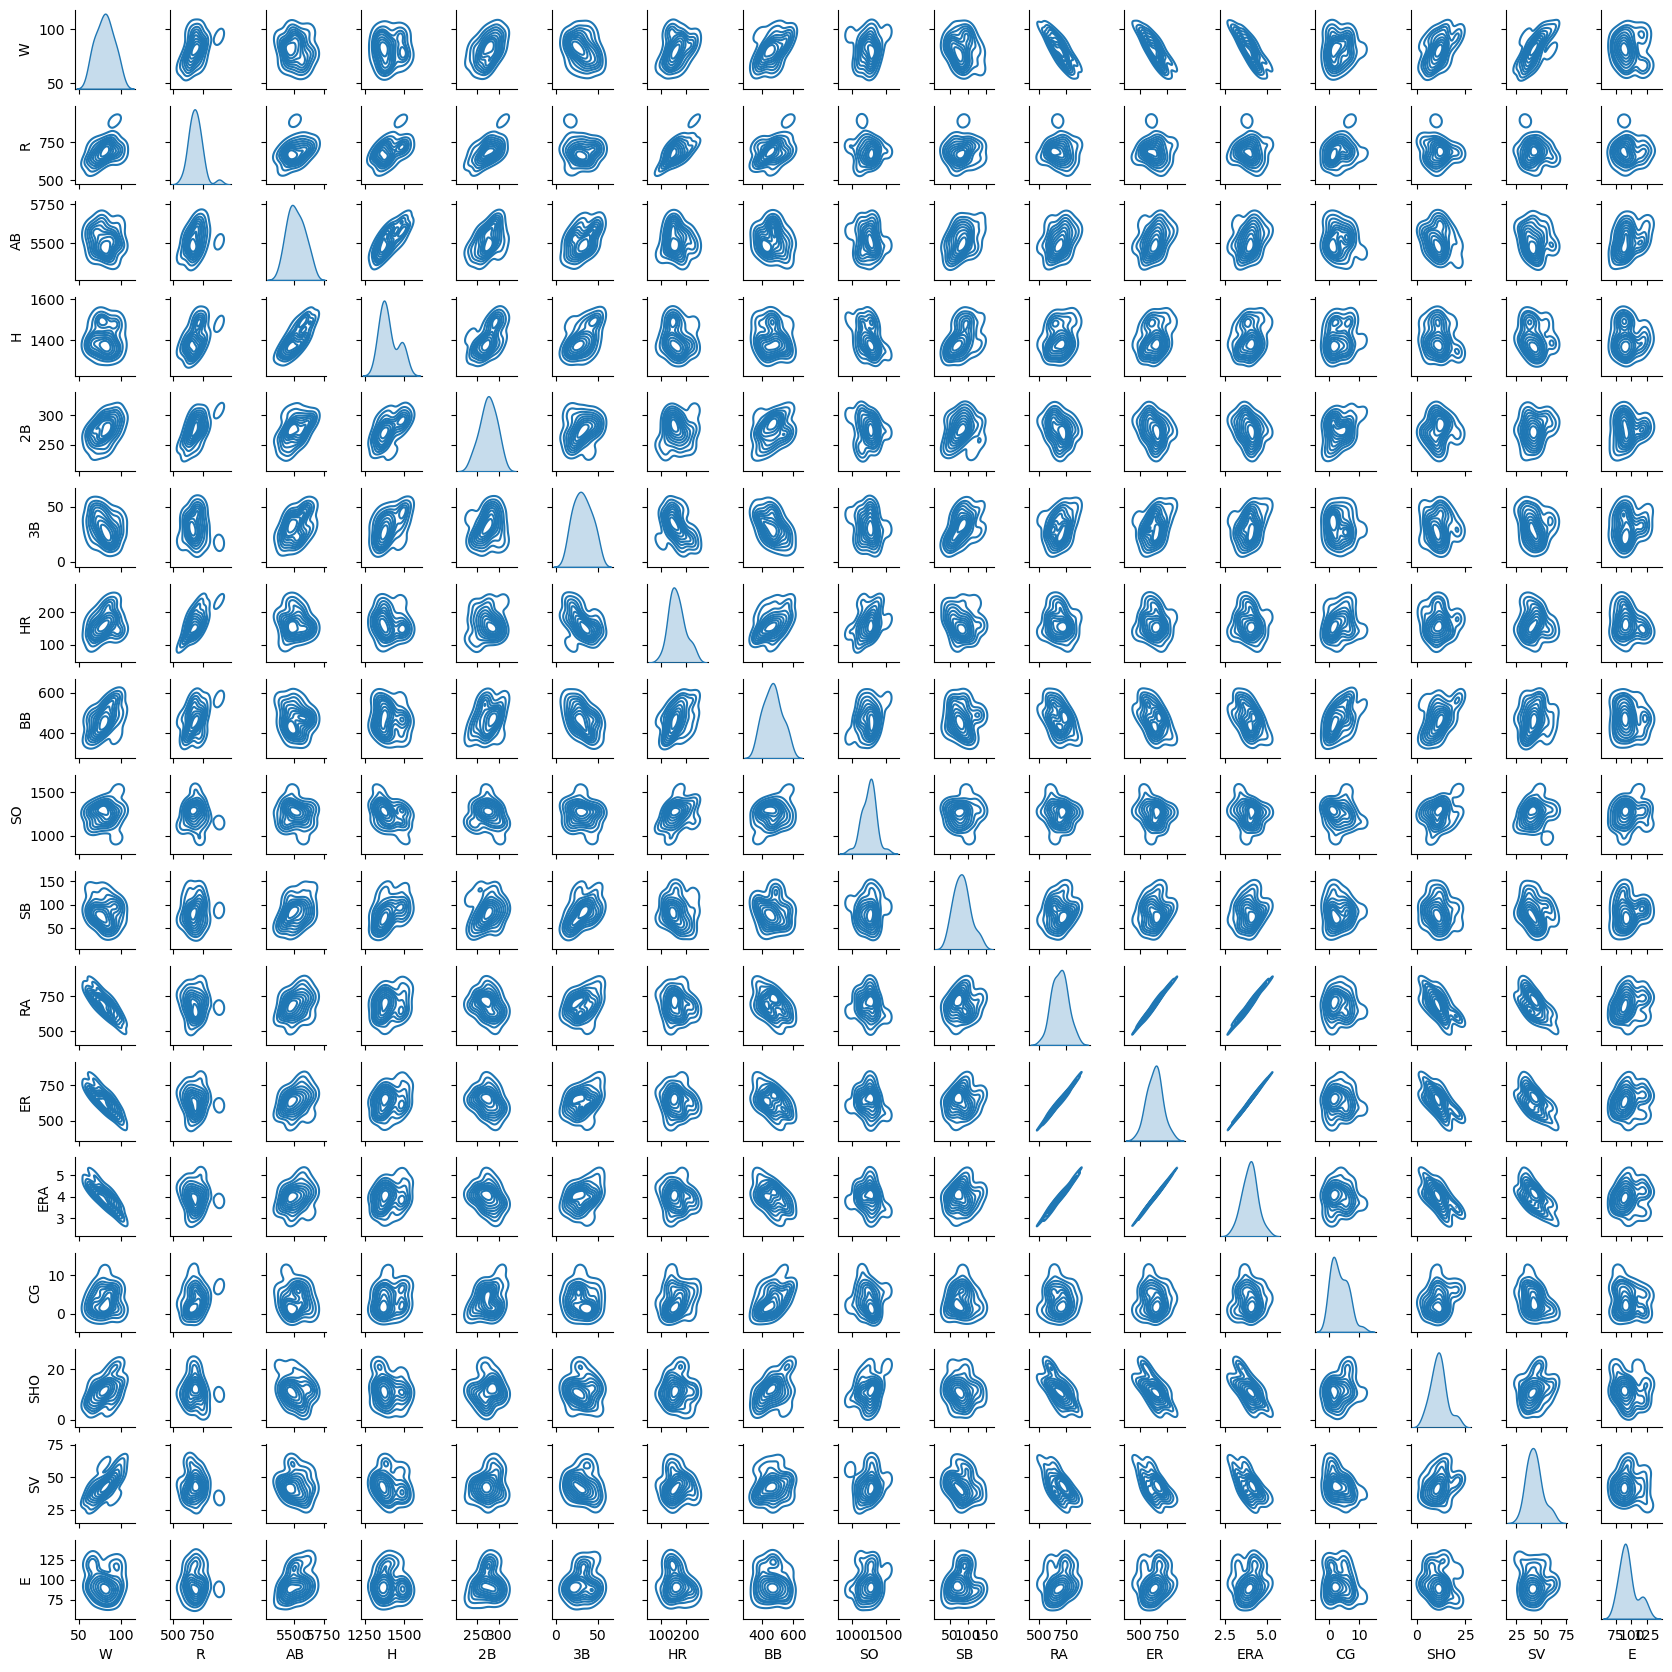

In [11]:
sns.pairplot(df,size=1,kind='kde')

The chart below shows how W (Wins) is correlated with other features.

<AxesSubplot:>

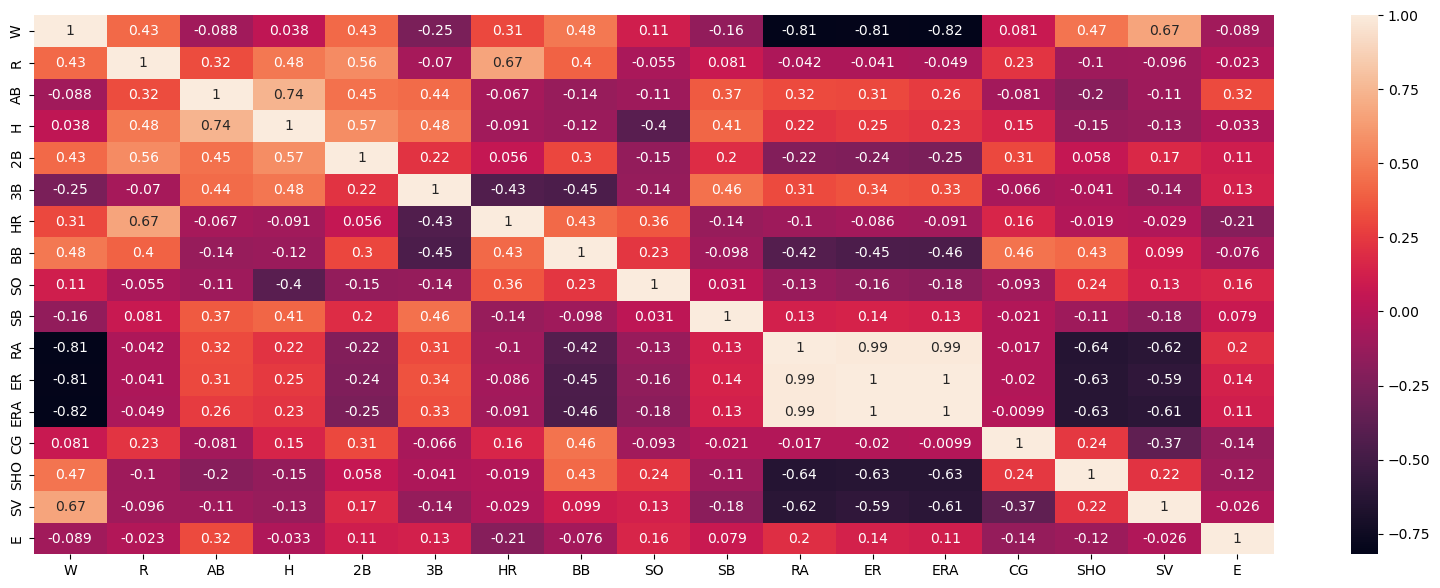

In [34]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True)

Observation:-

The chart shows that RA, ER, and ERA are very similar and have a strong negative effect on W. We will remove RA and ER and keep ERA for the prediction model.

In [35]:
df.drop(['RA', 'ER'], axis=1,inplace=True)

In [36]:
df.shape

(30, 15)

We are left with 15 features after removing two columns from the data.

In [37]:
df.isnull().sum()  #checking null values

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

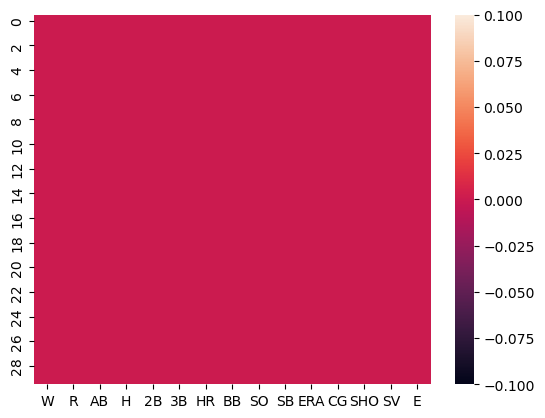

In [38]:
sns.heatmap(df.isna())

<AxesSubplot:>

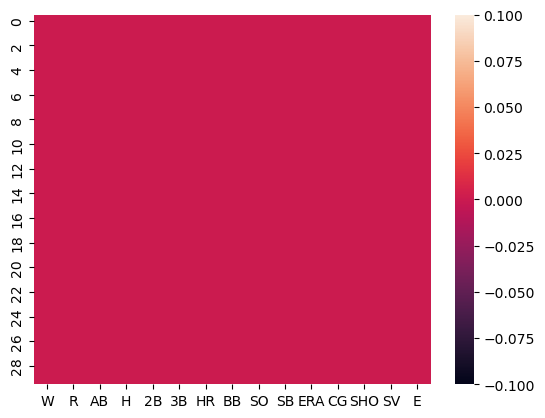

In [39]:
sns.heatmap(df.isnull())

The data has no missing values.

# Finding Correlation()

In [40]:
df.corr()

W         R        AB         H        2B        3B        HR  \
W    1.000000  0.430751 -0.087947  0.037612  0.427797 -0.251118  0.307407   
R    0.430751  1.000000  0.319464  0.482856  0.560084 -0.070072  0.671283   
AB  -0.087947  0.319464  1.000000  0.739122  0.453370  0.435422 -0.066983   
H    0.037612  0.482856  0.739122  1.000000  0.566847  0.478694 -0.090855   
2B   0.427797  0.560084  0.453370  0.566847  1.000000  0.220490  0.056292   
3B  -0.251118 -0.070072  0.435422  0.478694  0.220490  1.000000 -0.430915   
HR   0.307407  0.671283 -0.066983 -0.090855  0.056292 -0.430915  1.000000   
BB   0.484342  0.402452 -0.136414 -0.118281  0.302700 -0.454949  0.425691   
SO   0.111850 -0.054726 -0.106022 -0.398830 -0.150752 -0.141196  0.359923   
SB  -0.157234  0.081367  0.372618  0.413444  0.195027  0.457437 -0.136567   
ERA -0.819600 -0.049281  0.255551  0.231172 -0.254854  0.330951 -0.090917   
CG   0.080533  0.232042 -0.080876  0.147955  0.306675 -0.065898  0.156502   
SHO  0.471805 -0.103274 -0.197321 -0.145559  0.057998 -0.041396 -0.019119   
SV   0.666530 -0.096380 -0.106367 -0.130371  0.171576 -0.142370 -0.028540   
E   -0.089485 -0.023262  0.316743 -0.033173  0.105754  0.126678 -0.207597   

           BB        SO        SB       ERA        CG       SHO        SV  \
W    0.484342  0.111850 -0.157234 -0.819600  0.080533  0.471805  0.666530   
R    0.402452 -0.054726  0.081367 -0.049281  0.232042 -0.103274 -0.096380   
AB  -0.136414 -0.106022  0.372618  0.255551 -0.080876 -0.197321 -0.106367   
H   -0.118281 -0.398830  0.413444  0.231172  0.147955 -0.145559 -0.130371   
2B   0.302700 -0.150752  0.195027 -0.254854  0.306675  0.057998  0.171576   
3B  -0.454949 -0.141196  0.457437  0.330951 -0.065898 -0.041396 -0.142370   
HR   0.425691  0.359923 -0.136567 -0.090917  0.156502 -0.019119 -0.028540   
BB   1.000000  0.233652 -0.098347 -0.459832  0.462478  0.426004  0.099445   
SO   0.233652  1.000000  0.030968 -0.180368 -0.093418  0.237721  0.126297   
SB  -0.098347  0.030968  1.000000  0.126063 -0.020783 -0.106563 -0.183418   
ERA -0.459832 -0.180368  0.126063  1.000000 -0.009856 -0.630833 -0.607005   
CG   0.462478 -0.093418 -0.020783 -0.009856  1.000000  0.241676 -0.367766   
SHO  0.426004  0.237721 -0.106563 -0.630833  0.241676  1.000000  0.221639   
SV   0.099445  0.126297 -0.183418 -0.607005 -0.367766  0.221639  1.000000   
E   -0.075685  0.155133  0.079149  0.113137 -0.140047 -0.115716 -0.025636   

            E  
W   -0.089485  
R   -0.023262  
AB   0.316743  
H   -0.033173  
2B   0.105754  
3B   0.126678  
HR  -0.207597  
BB  -0.075685  
SO   0.155133  
SB   0.079149  
ERA  0.113137  
CG  -0.140047  
SHO -0.115716  
SV  -0.025636  
E    1.000000

<AxesSubplot:>

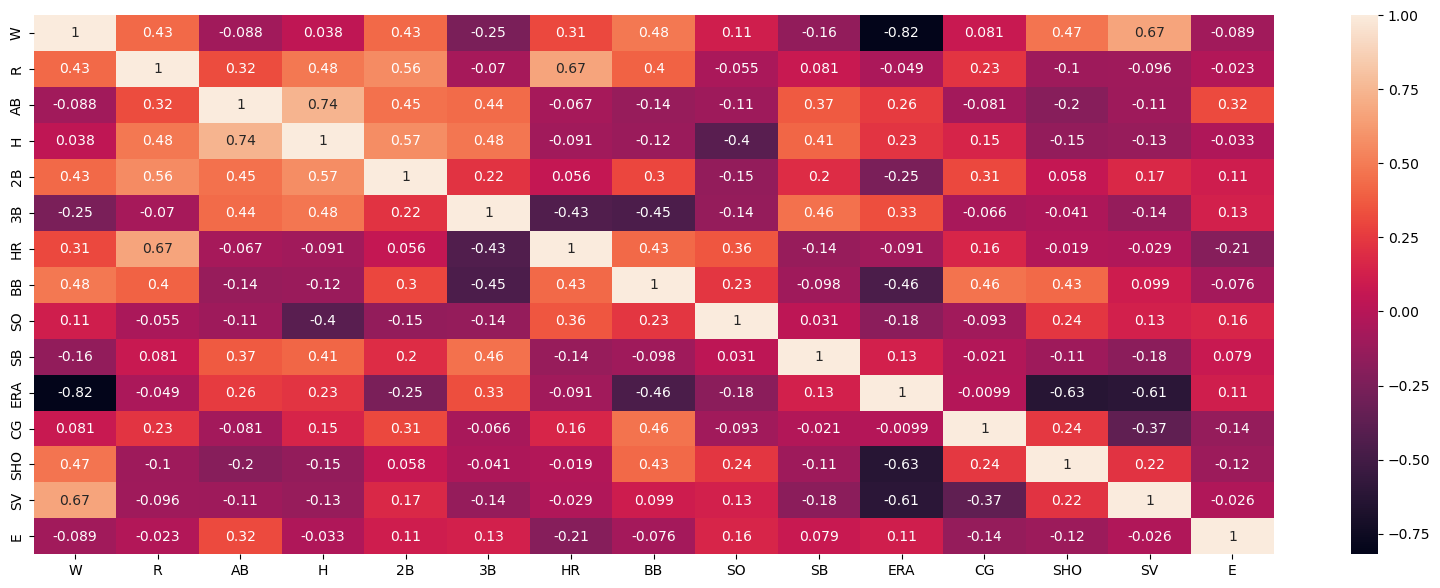

In [41]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True)

ERA is the only negative feature left in the data. The data has low correlation with wins. SV, SHO, BB, 2B, and R are moderately correlated with wins. ERA is also related to SV and SHO.

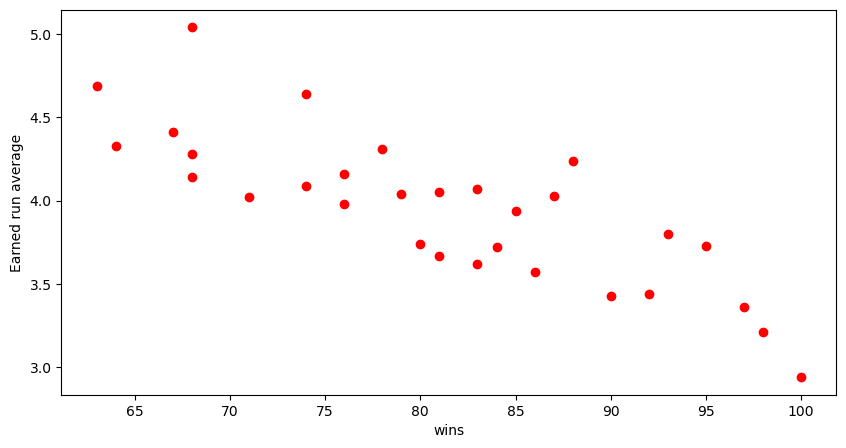

In [42]:
plt.figure(figsize=(10,5))
plt.scatter(df['W'], df['ERA'], c='Red')
plt.xlabel('wins')
plt.ylabel('Earned run average')
plt.show()

The data shows that more wins are associated with lower Earned Run Average. Teams with 65 to 88 wins have 4 to 5 runs on average, while teams with 90 to 100 wins have 3 to 4 runs on average. This may indicate that playing aggressively leads to more runs but also more risks.

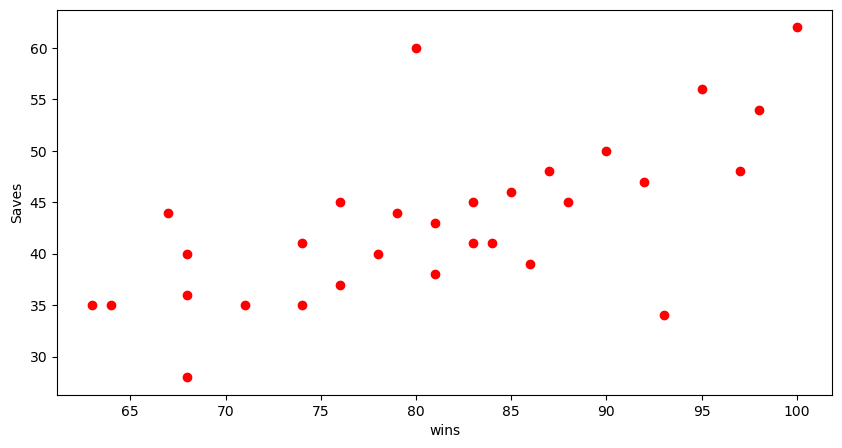

In [43]:
plt.figure(figsize=(10,5))
plt.scatter(df['W'],df['SV'],c='Red')
plt.xlabel('wins')
plt.ylabel('Saves')
plt.show()

We can see here that saves have an impact on wins. Higher saves increase the chances of winning.

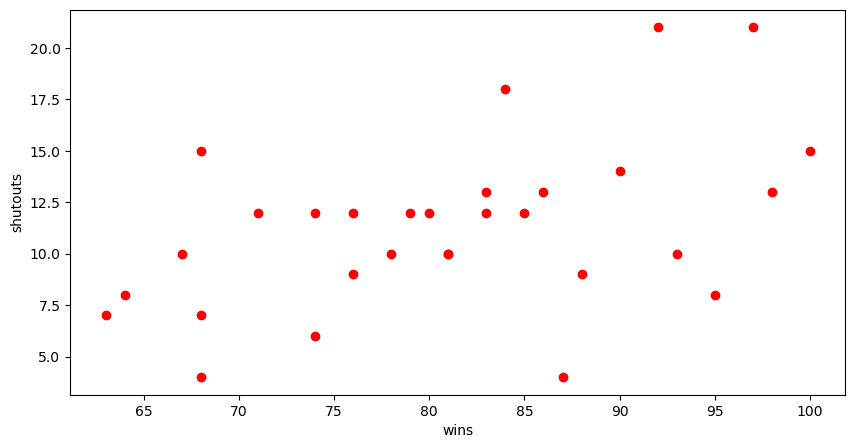

In [44]:
plt.figure(figsize=(10,5))
plt.scatter(df['W'],df['SHO'],c='Red')
plt.xlabel('wins')
plt.ylabel('shutouts')
plt.show()

Shutouts have a slight effect on the data. In some cases, higher shutouts are associated with more wins.

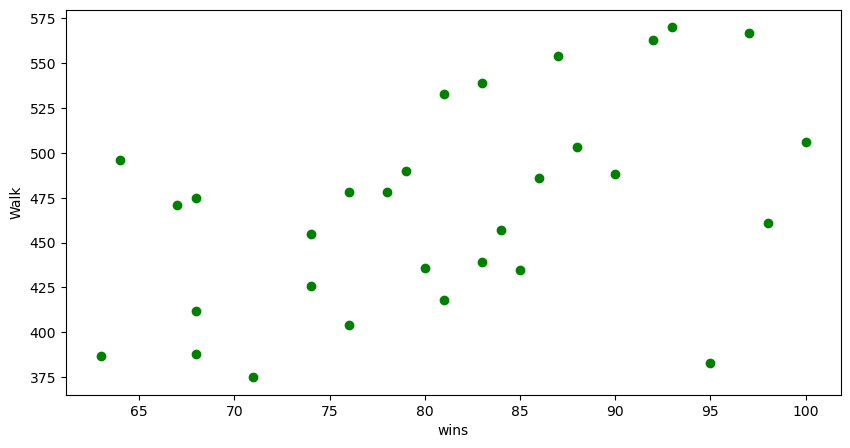

In [45]:
plt.figure(figsize=(10,5))
plt.scatter(df['W'],df['BB'],c='Green')
plt.xlabel('wins')
plt.ylabel('Walk')
plt.show()

We can also observe that more walks are related to more wins.

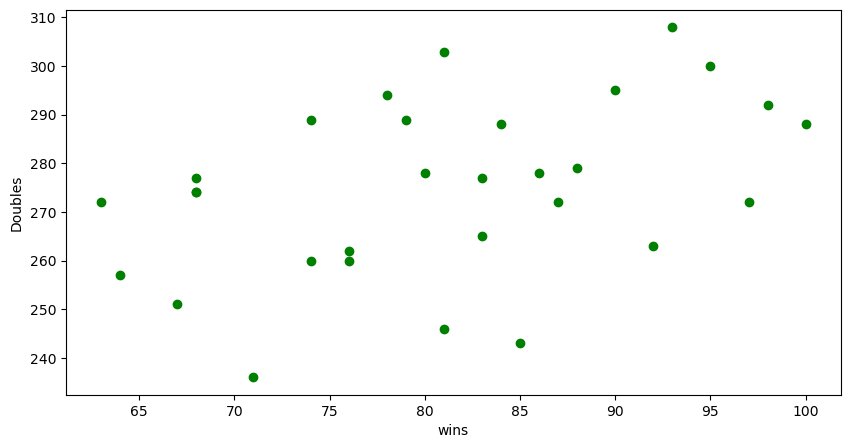

In [46]:
plt.figure(figsize=(10,5))
plt.scatter(df['W'],df['2B'],c='Green')
plt.xlabel('wins')
plt.ylabel('Doubles')
plt.show()

Doubles also contribute to wins. More doubles in a match lead to more wins.

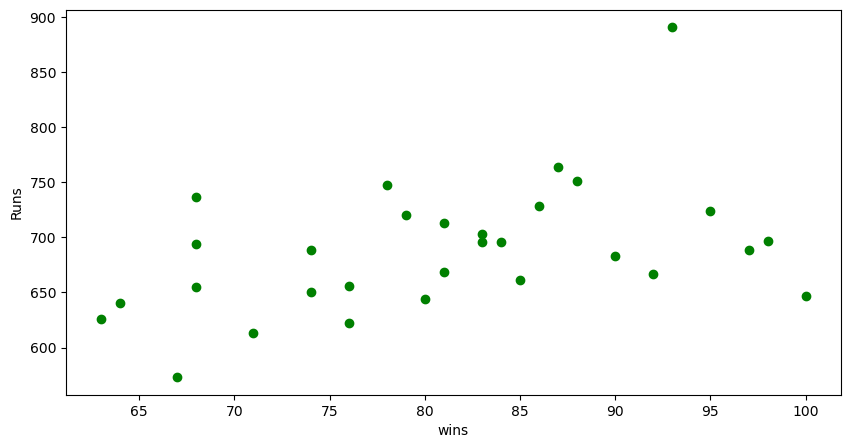

In [47]:
plt.figure(figsize=(10,5))
plt.scatter(df['W'],df['R'],c='Green')
plt.xlabel('wins')
plt.ylabel('Runs')
plt.show()

Most of the winning matches have scores between 600 and 800, so the data does not show much variation. However, there are some outliers as well.

# Dealing with outliers

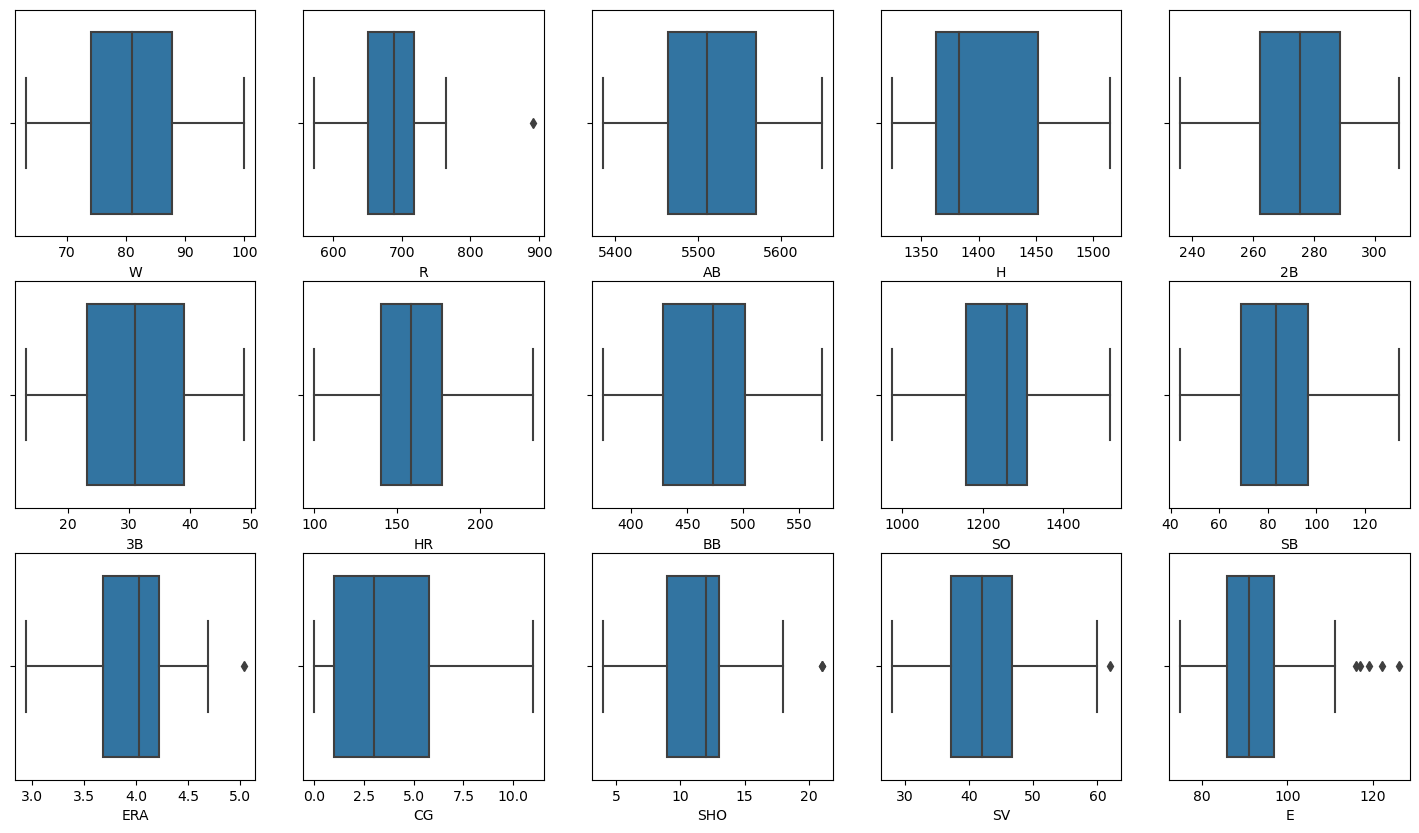

In [48]:
plt.figure(figsize=(18,10))
for i in enumerate(df):
    plt.subplot(3,5,i[0]+1)
    sns.boxplot(df[i[1]])

There are outliers in the data for only 5 columns: R, ERA, SHO, SV, and E.

# Z-value approach

In [49]:
from scipy import stats

In [50]:
# zscore
import pandas as pd
from scipy.stats import zscore
z = np.abs(zscore(df))
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [52]:
df_1 = df[(z<3).all(axis=1)]
print("With Outliers::",df.shape)
print("After Removing Outliers::",df_1.shape)

With Outliers:: (30, 15)
After Removing Outliers:: (29, 15)


Only one row was eliminated by using the Z-score method.

In [53]:
# Calculate the z-scores for each column
df_zscore = df.apply(zscore)

In [55]:
# Access the z-score of a specific element
z = np.array(df_zscore)
z_score = z[5, 1]
print("Z-score of element (5, 1):", z_score)

Z-score of element (5, 1): 3.5096470447193067


In this code, we first import the necessary libraries. Then, we load the "baseball.csv" dataset into a pandas DataFrame called df. We then use the apply function along with zscore to calculate the z-scores for each column in the DataFrame. Next, we convert the resulting DataFrame df_zscore into a NumPy array z. Finally, we access the z-score of a specific element in the array using the NumPy indexing syntax z[5, 1] and print it to the console.

In [54]:
# Print the z-scores
print(df_zscore)

           W         R        AB         H        2B        3B        HR  \
0   1.365409  0.619078  0.847731  1.663685  1.420173  1.041193 -0.787299   
1   0.197838  0.134432 -0.711094 -0.970681  0.127403  1.235809 -0.243967   
2   0.003243 -0.332906 -1.115233 -0.151891  1.588795 -0.223808 -0.723377   
3  -0.483244 -1.146419  0.241522 -0.401088 -0.828122 -0.418423 -0.883181   
4  -0.677839  0.013270  1.280738  1.984081  0.801892  1.722347 -0.403770   
5   1.170814  3.509647 -0.104884  1.361089  1.869832 -1.391501  2.185047   
6   0.587028  1.311430  0.732263 -0.116292 -0.153633 -1.196885  1.545833   
7   0.003243  0.428681 -0.451289 -0.596886 -1.615025 -1.099578  1.705636   
8  -0.094054 -0.765626 -0.451289 -0.365489  0.183611  0.068115  0.107601   
9  -0.288649  1.034489  1.785913  1.628086  1.082929  0.165423 -0.084163   
10  0.684326  1.086415 -0.076017  0.275303  0.239818  0.068115  0.267405   
11  0.489731  0.705622 -0.826562 -0.721484  0.183611 -0.515731  2.121125   
12  0.392433

# Interquartile range method(IQR)

In [53]:
#IQR
from scipy import stats
IQR = stats.iqr(df)
IQR

614.25

In [54]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [55]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(30, 15)


The IQR method does not detect any outliers. This is logically possible because the data is very small. We choose the Z-score method and do not remove any outliers because we have very little data.

In [56]:
df = df_1

In [57]:
df.shape

(29, 15)

# Separating data into X and Y components

In [58]:
x= df.drop(['W'],axis=1)
y=df['W']

# Reducing skewness in data

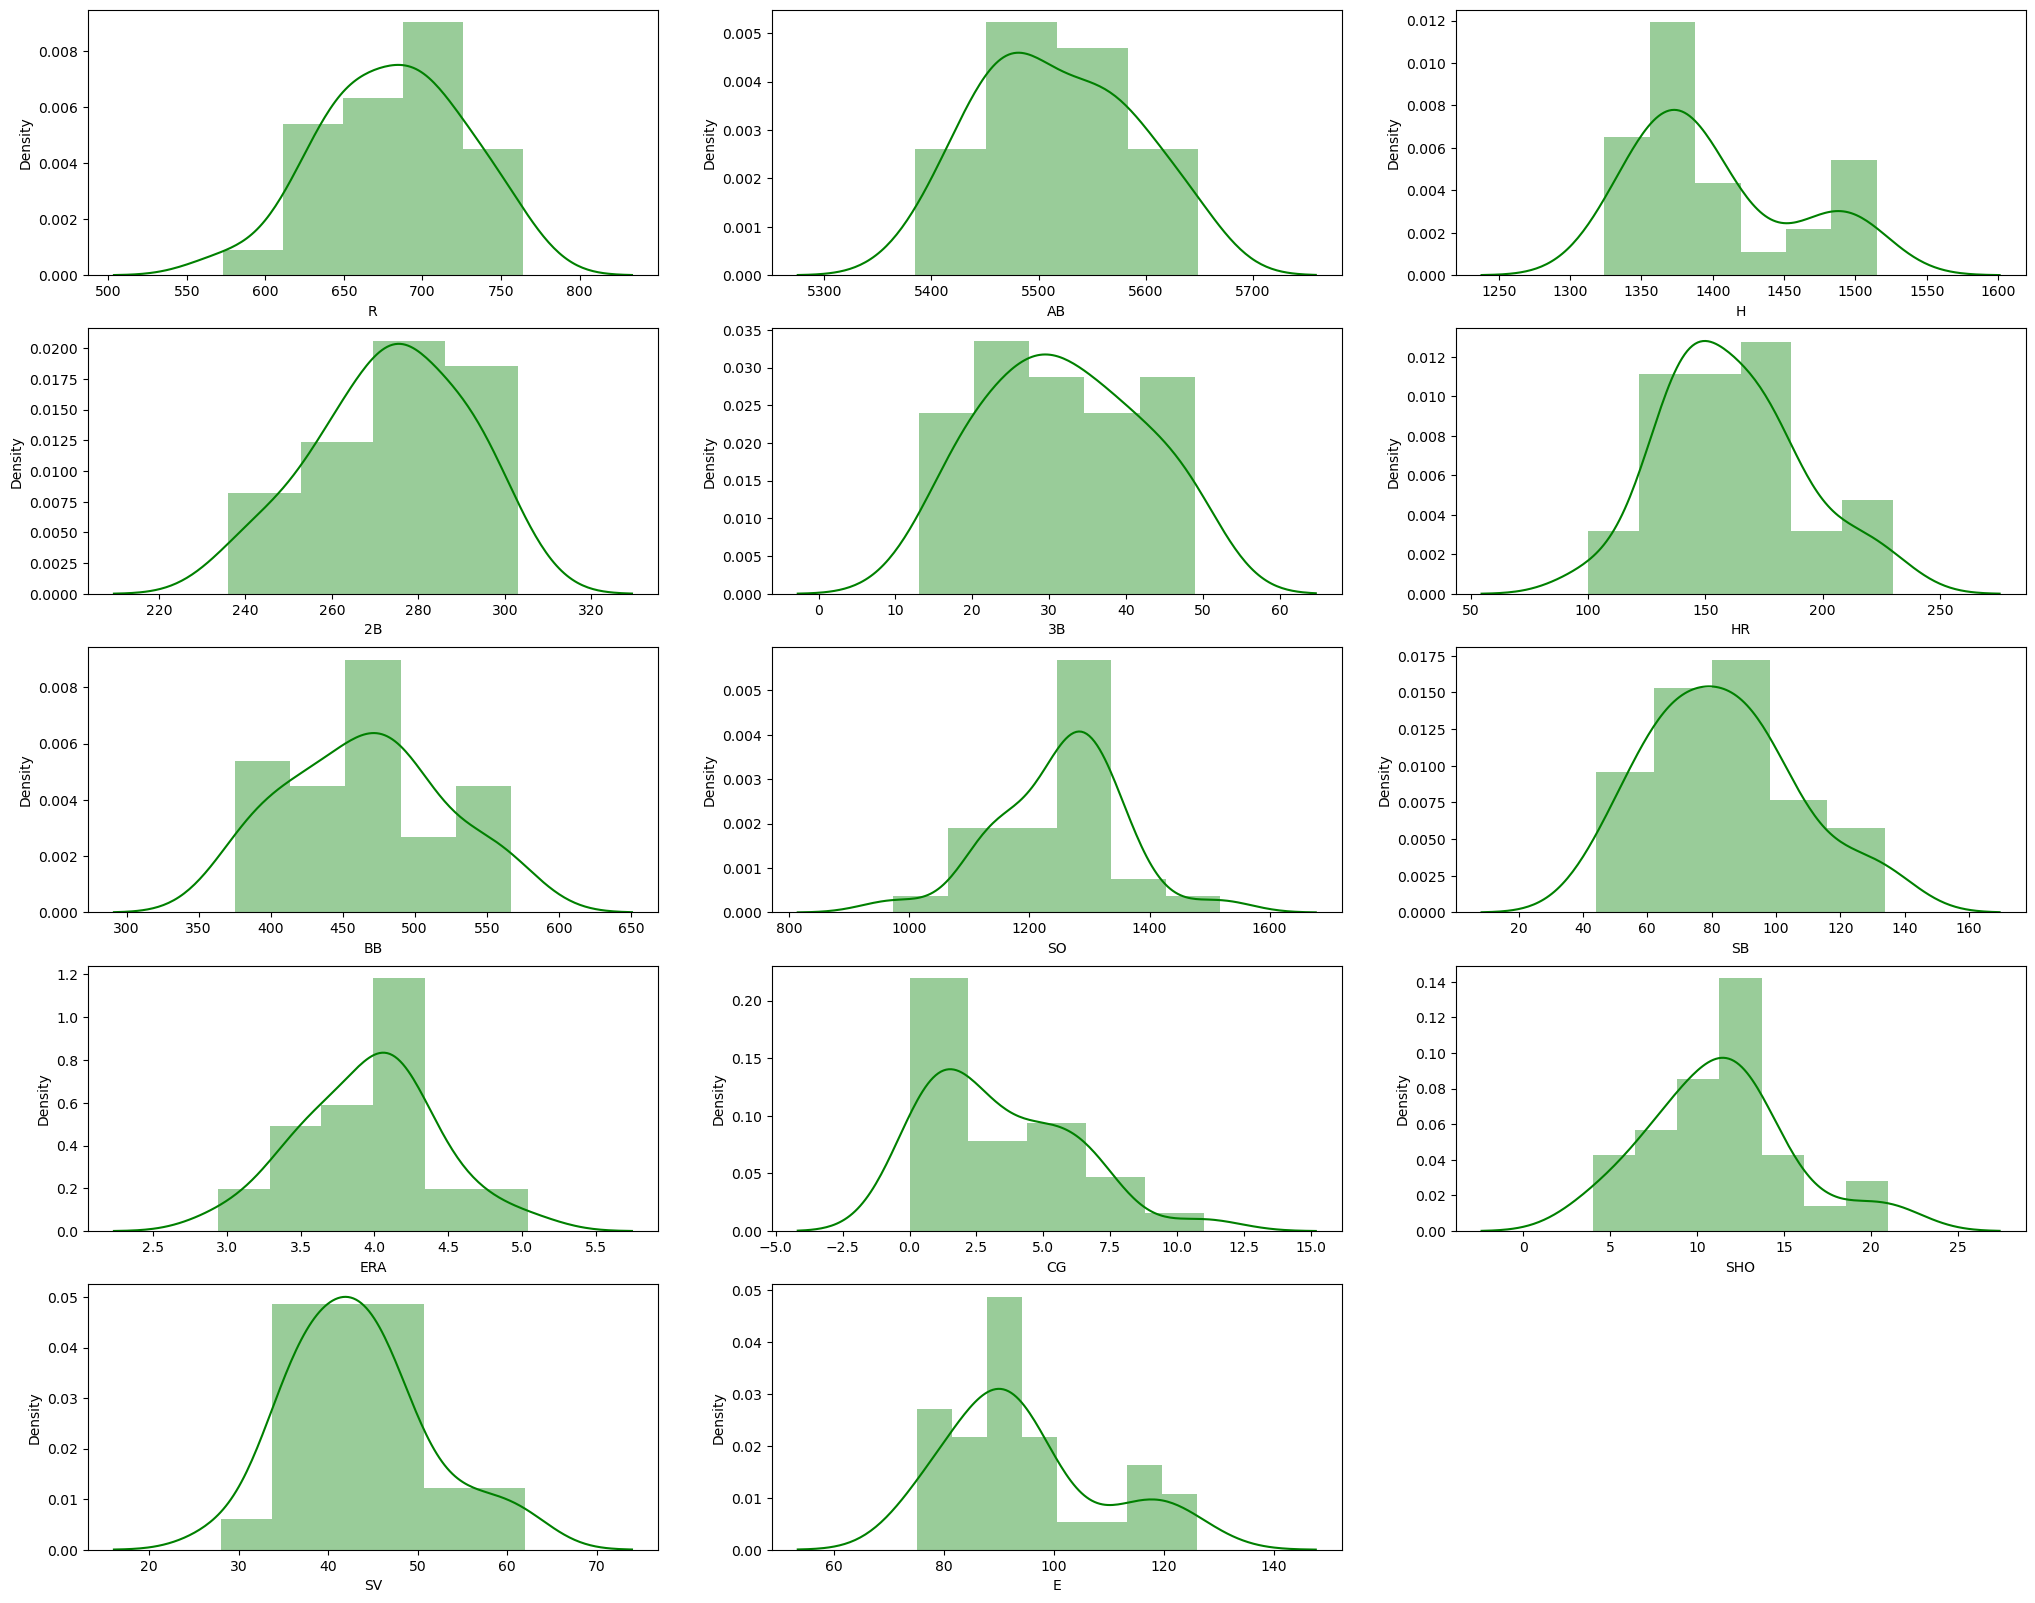

In [59]:
plt.figure(figsize=(25,20))
for i in enumerate(x.columns):
    plt.subplot(5,3,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [60]:
x.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

Some columns (H, CG, SHO, SV, E) have skewed data. We will adjust the skewness for values above +/-0.5.

We are making these columns (H, CG, SHO, SV, E) more symmetric by reducing their skewness.

In [61]:
from sklearn.preprocessing import power_transform
x[['H','CG','SHO','SV','E']]=power_transform(x[['H','CG','SHO','SV','E']],method='yeo-johnson')

In [62]:
x.skew()

R     -0.215364
AB     0.169573
H      0.000000
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

The skewness has been almost eliminated from every column.

# Applying standardization to X values

In [63]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

So here not scaling the data it's making lot's of values==0

In [64]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [65]:
pd.DataFrame(x).describe()

0          1     2          3          4          5          6   \
count  29.000000  29.000000  29.0  29.000000  29.000000  29.000000  29.000000   
mean    0.566709   0.498171   0.0   0.560988   0.522031   0.471353   0.471983   
std     0.237471   0.271595   0.0   0.257760   0.285448   0.227698   0.285046   
min     0.000000   0.000000   0.0   0.000000   0.000000   0.000000   0.000000   
25%     0.403141   0.295455   0.0   0.388060   0.361111   0.307692   0.265625   
50%     0.607330   0.477273   0.0   0.567164   0.527778   0.430769   0.500000   
75%     0.732984   0.704545   0.0   0.776119   0.722222   0.592308   0.630208   
max     1.000000   1.000000   0.0   1.000000   1.000000   1.000000   1.000000   

              7          8          9          10         11         12  \
count  29.000000  29.000000  29.000000  29.000000  29.000000  29.000000   
mean    0.511104   0.437165   0.486535   0.462820   0.496773   0.545151   
std     0.190697   0.257811   0.219594   0.271806   0.244940   0.222023   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.341284   0.277778   0.347619   0.230279   0.373171   0.400262   
50%     0.533945   0.433333   0.519048   0.495369   0.553751   0.556566   
75%     0.622018   0.588889   0.619048   0.668644   0.609418   0.666996   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

              13  
count  29.000000  
mean    0.508101  
std     0.276493  
min     0.000000  
25%     0.361169  
50%     0.508619  
75%     0.612261  
max     1.000000

We can see that the data has been scaled

# Creating training and testing subsets from the data

In [66]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# We look for the optimal random state in the following cell

In [67]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state{i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state{i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state0, The training accuracy is :-0.9730947151496028
At random state0, The test accuracy is :-0.4803243633239517


At random state1, The training accuracy is :-0.961045232311694
At random state1, The test accuracy is :-0.6891884733447917


At random state2, The training accuracy is :-0.9402440879067483
At random state2, The test accuracy is :-0.2956433349813157


At random state3, The training accuracy is :-0.9636459278075228
At random state3, The test accuracy is :-0.6179134916773945


At random state4, The training accuracy is :-0.9590949693496181
At random state4, The test accuracy is :-0.7969421076715502


At random state5, The training accuracy is :-0.9551231963874857
At random state5, The test accuracy is :-0.536628929785443


At random state6, The training accuracy is :-0.9601627847931741
At random state6, The test accuracy is :-0.7440770072577897


At random state7, The training accuracy is :-0.9464230467928701
At random state7, The test accuracy is :-0.8327718370224

Since random state=99 yields the best accuracy, we select it as the random state.

In [68]:
# We divide the data into a 78% train set and a 22% test set.

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=99)

In [69]:
x_train.shape

(22, 14)

In [70]:
y_train.shape

(22,)

In [71]:
x_test.shape

(7, 14)

In [72]:
y_test.shape

(7,)

# MODEL CONSTRUCTION:

# Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.9411713529485165


In [74]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 12.672633550148328
MAE: 3.2741362790608854
r2_score: 0.8977213310275122


# Ridge regression 

In [75]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.7900161919802784


In [76]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 49.239187061063774
MAE: 6.2005454983800705
r2_score: -0.7668782142053812


# Support Vector Regression

# SVR(kernel=‘linear’) 

In [77]:
from sklearn.svm import SVR


svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.30528092031070986


In [78]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 92.33046990756982
MAE: 8.297178483476788
r2_score: -15.403272063076379


# SVR(kernel='poly')

In [79]:
svr_p=SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

0.9623520035446798


In [80]:
print('MSE:',mean_squared_error(svrpred_p,y_test))
print('MAE:',mean_absolute_error(svrpred_p,y_test))
print('r2_score:',r2_score(svrpred_p,y_test))

MSE: 25.082457868810074
MAE: 4.444342971619469
r2_score: 0.7896849748653584


# SVR(kernel_rbf)

In [81]:
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.19209180923383828


In [82]:
print('MSE:',mean_squared_error(svrpred_r,y_test))
print('MAE:',mean_absolute_error(svrpred_r,y_test))
print('r2_score:',r2_score(svrpred_r,y_test))

MSE: 116.13067806934706
MAE: 9.435955372289124
r2_score: -89.25744991027202


# Random Forest Regressor

In [83]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9440521173783166


In [84]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 56.61992857142854
MAE: 6.8128571428571405
r2_score: -0.4713584894773417


# Decision Tree Regressor

In [85]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [86]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 48.857142857142854
MAE: 6.285714285714286
r2_score: 0.24905897114178166


# Gradient Boosting Regressor

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.9999999858489446


In [88]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 54.10564120650036
MAE: 6.501534794172067
r2_score: -0.07310449126914786


# Cross Validation Score

In [89]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),
             GradientBoostingRegressor(),]


names = ['LR', 'R', 'svr', 'svr_p', 'svr_r', 'RF', 'DTR', 'GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}  : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR  : 27.033589, 21.860738
R  : 35.880015, 28.804724
svr  : 74.591235, 58.448260
svr_p  : 31.647625, 16.838681
svr_r  : 95.650187, 68.864422
RF  : 42.594893, 27.840806
DTR  : 56.250000, 35.508782
GBR  : 46.239162, 31.227040


Based on all the metrics scores, we choose LinearRegression as the final model.

# HYPER PARAMETER TUNING:

# GridsearchCV

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
LR = LinearRegression
param={
      'fit_intercept':[True,False],
     'copy_X':[True],
    'n_jobs':[-1],
  'positive' : [True],
}

In [92]:
LR_grid=GridSearchCV(LinearRegression(),param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [93]:
LR_grid.fit(x_train,y_train)
LR_grid_Pred=LR_grid.best_estimator_.predict(x_test)

Fitting 4 folds for each of 2 candidates, totalling 8 fits


In [94]:
LR_grid.best_estimator_.predict(x_test)

array([76.45621352, 65.09807686, 95.08772745, 84.24426739, 83.10533837,
       92.65600567, 82.13923134])

In [95]:
print('MSE:',mean_squared_error(LR_grid_Pred,y_test))
print('MAE:',mean_absolute_error(LR_grid_Pred,y_test))
print('r2_score:',r2_score(LR_grid_Pred,y_test))

MSE: 25.82765799660208
MAE: 3.7618490017363433
r2_score: 0.7007977209358371


In [96]:
LR_grid_Pred

array([76.45621352, 65.09807686, 95.08772745, 84.24426739, 83.10533837,
       92.65600567, 82.13923134])

<AxesSubplot:xlabel='W', ylabel='Density'>

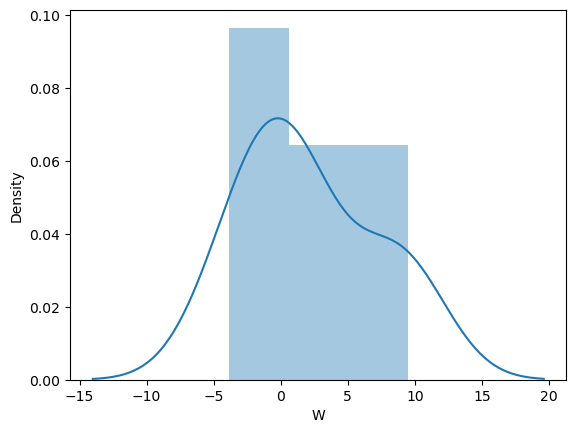

In [97]:
sns.distplot(LR_grid_Pred-y_test)

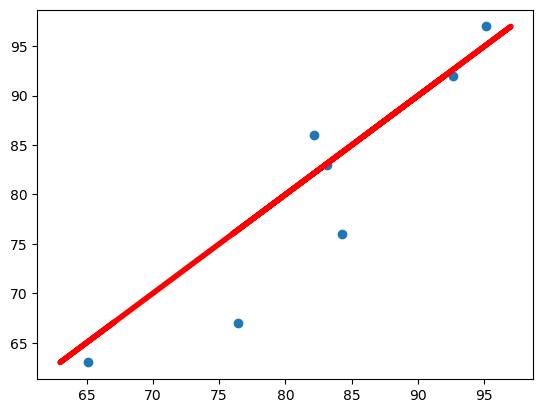

In [98]:
plt.scatter(LR_grid_Pred,y_test)
plt.plot(y_test,y_test,linewidth=4,color='Red')

We select LinearRegressor as the best model after using GridSearchCV.

# Model Saving

In [99]:
import joblib

In [100]:
joblib.dump(LR_grid.best_estimator_,'Baseball Case Study_Project.obj')

['Baseball Case Study_Project.obj']

In [15]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [16]:
df=df[[ 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E','W']]

<AxesSubplot:>

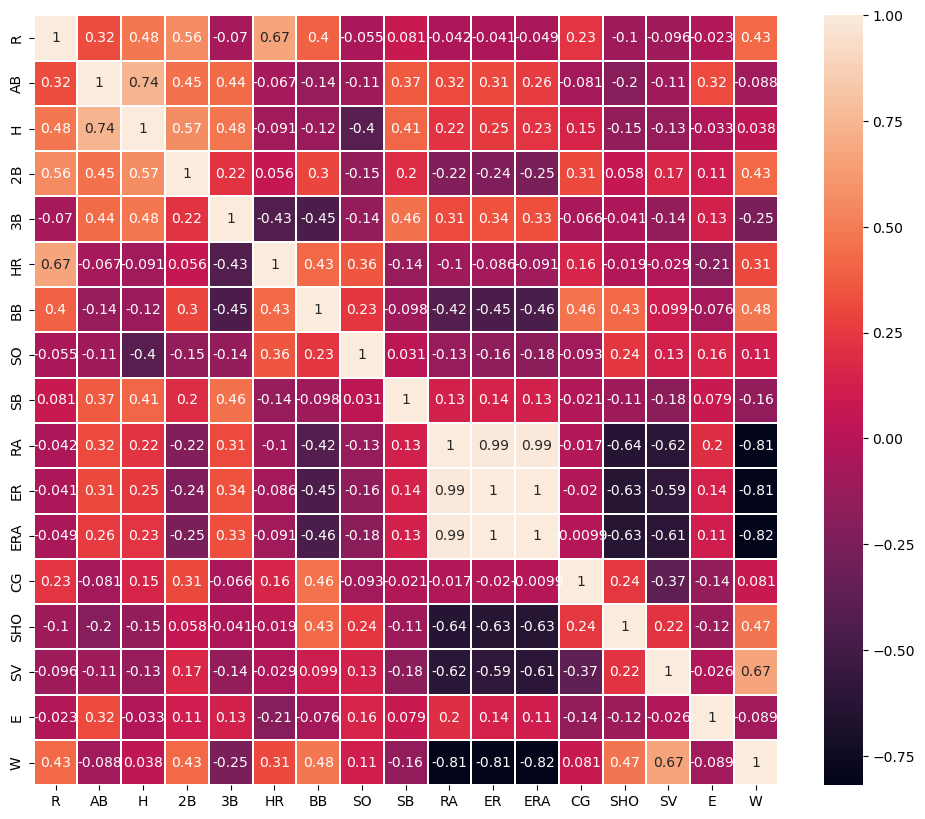

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=.25)

Correlation analysis, First independent vs dependent
R,HR,2B,BB,SHO, SV have a strong positive correlation with the target variable (W)
AB, H, 3B, SO,SB,CG,E have a weak correlation with the target variable (both positive and negative)
RA, ER, ERA have a strong negative correlation with the target variable and with each other. These features can bias the result. We need to decide whether to drop any of them.
AB and H are highly correlated to each other at 74%

# EDA

In [18]:
df.columns

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E', 'W'],
      dtype='object')

<AxesSubplot:xlabel='R', ylabel='W'>

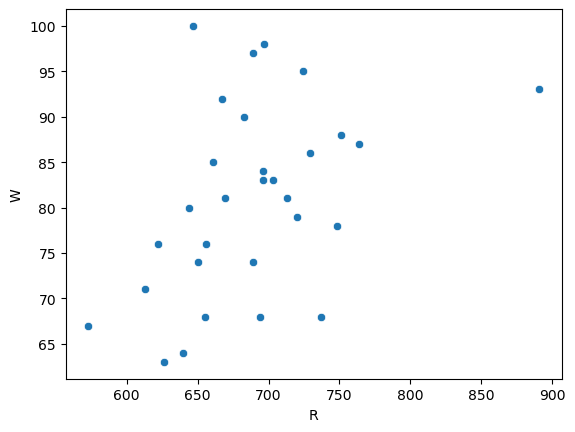

In [19]:
#Relationship between Runs scored and Win
sns.scatterplot('R','W',data=df)

#sns.relplot(x=“R”, y=“W”, data=df);

There is a positive relationship between Runs scored and Wins, the more runs, the higher the chances of winning.

<AxesSubplot:xlabel='AB', ylabel='W'>

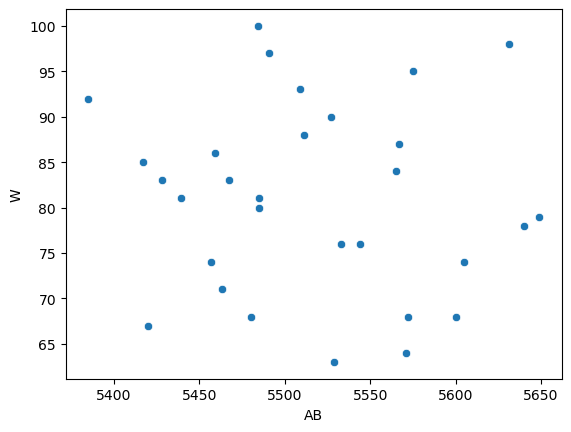

In [20]:
#Relationship between AB and Win
sns.scatterplot('AB','W',data=df)

The data is scattered and does not show any clear trend, it is not useful for predicting the chances of winning, it has a weak correlation.

<AxesSubplot:xlabel='H', ylabel='W'>

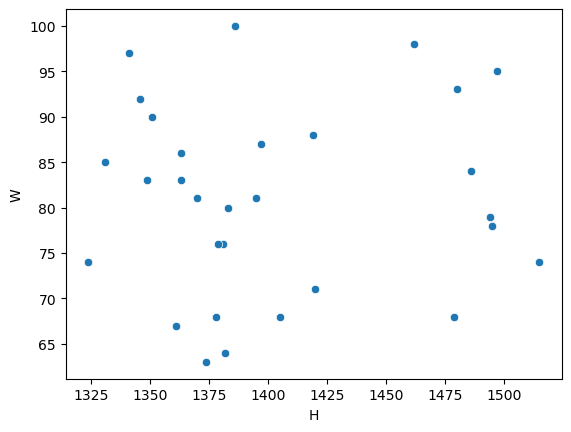

In [21]:
#Relationship between H and Win
sns.scatterplot('H','W',data=df)

In [4]:
#The data is scattered and does not show any clear trend, it has a very low correlation with Win at 0.038, we can drop 
#this feature, it will not help to predict the win.

<AxesSubplot:xlabel='2B', ylabel='W'>

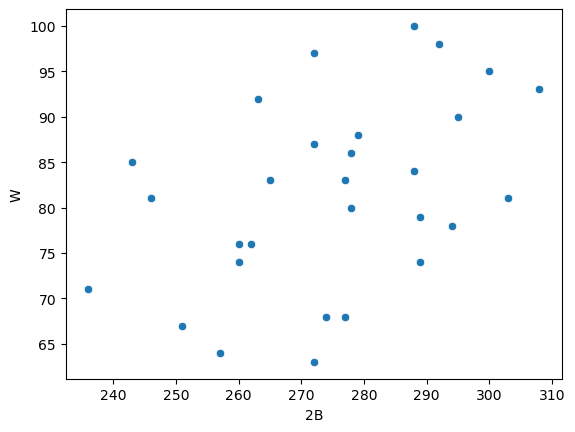

In [22]:
#Relationship between 2B and Win
sns.scatterplot('2B','W',data=df)

In [5]:
#There is a positive relationship between 2B and Win, the more 2B, the higher the chances of winning.

<AxesSubplot:xlabel='3B', ylabel='W'>

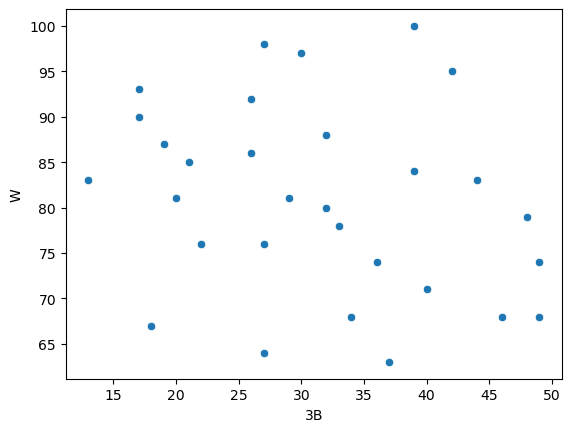

In [23]:
#Relationship between 3B and Win
sns.scatterplot('3B','W',data=df)

In [6]:
#This distribution has a weak correlation, it will not help to predict Win better.

<AxesSubplot:xlabel='HR', ylabel='W'>

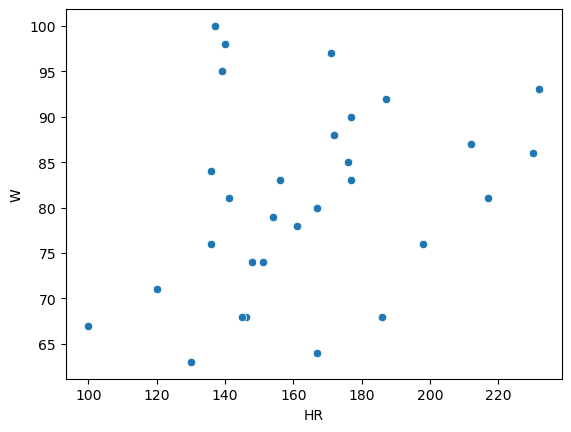

In [24]:
#Relationship between HR and Win

sns.scatterplot('HR','W',data=df)

In [7]:
#There is a positive relationship.

In [25]:
df.columns

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E', 'W'],
      dtype='object')

<AxesSubplot:xlabel='BB', ylabel='W'>

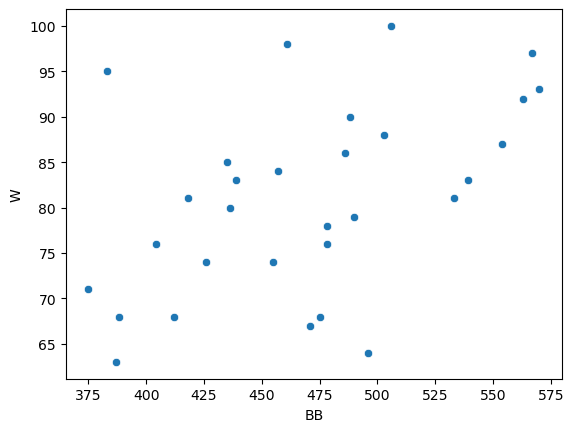

In [26]:
# Relationship between BB and Win
sns.scatterplot('BB','W',data=df)

In [8]:
#There is a positive relationship between BB and Win.

<AxesSubplot:xlabel='SO', ylabel='W'>

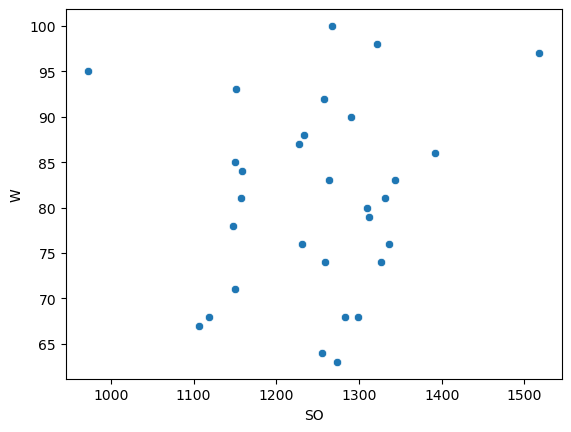

In [27]:
# Relationship between SO and Win

sns.scatterplot('SO','W',data=df)

In [ ]:
#There is a weak positive relationship.

<AxesSubplot:xlabel='SB', ylabel='W'>

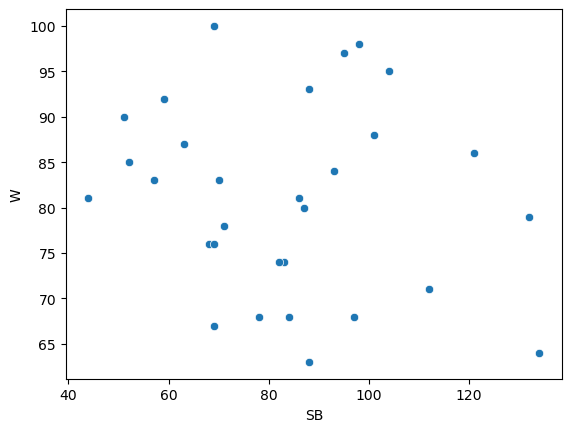

In [28]:
# Relationship between SB and Win

sns.scatterplot('SB','W',data=df)

In [ ]:
#There is a weak negative relationship.

<AxesSubplot:xlabel='RA', ylabel='W'>

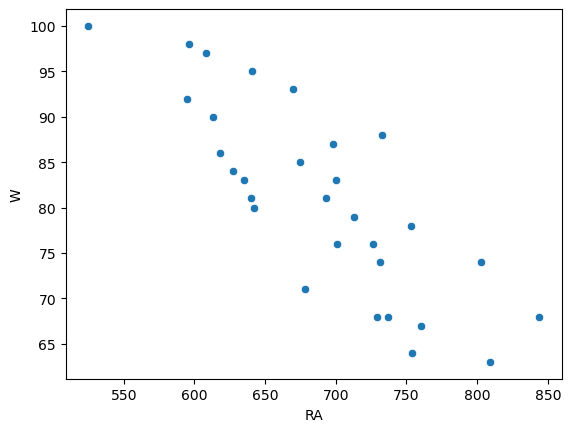

In [29]:
#Relationship between RA and Win

sns.scatterplot('RA','W',data=df)

In [ ]:
#There is a strong negative relationship.

<AxesSubplot:xlabel='ER', ylabel='W'>

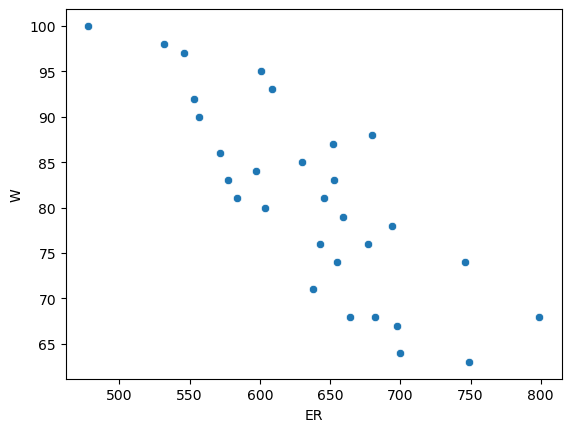

In [30]:
# Relationship between ER and Win

sns.scatterplot('ER','W',data=df)

In [ ]:
#Strongly inversely related.

<AxesSubplot:xlabel='ERA', ylabel='W'>

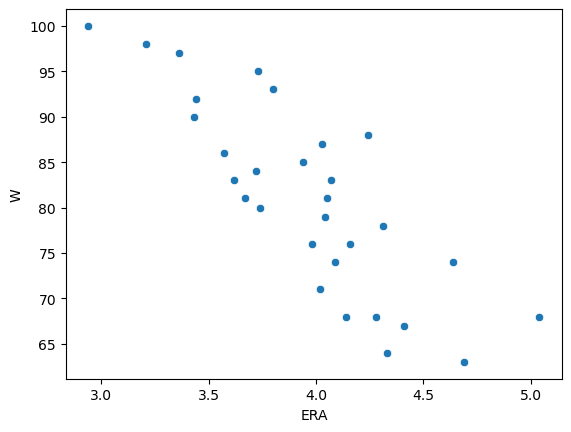

In [31]:
#Relationship between ERA and Win

sns.scatterplot('ERA','W',data=df)

In [ ]:
#Strongly inversely related.

<AxesSubplot:xlabel='CG', ylabel='W'>

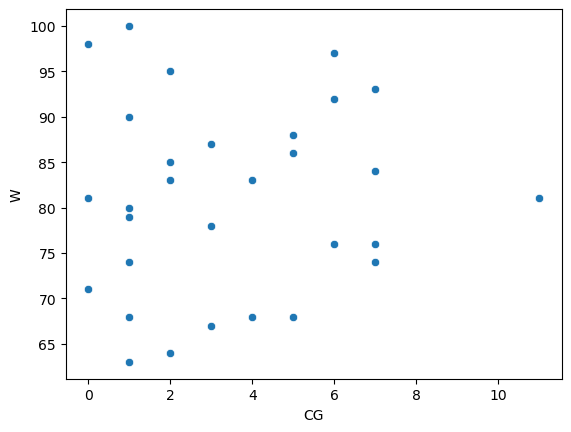

In [32]:
# Relationship between CG and Win 

sns.scatterplot('CG','W',data=df)

In [ ]:
#Weakly associated.

<AxesSubplot:xlabel='SHO', ylabel='W'>

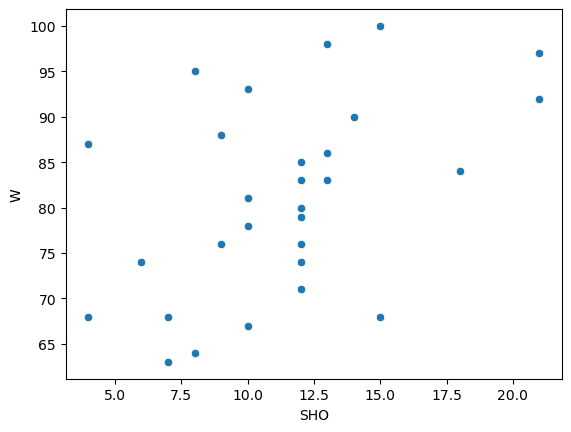

In [33]:
# Relationship between SHO and Win  

sns.scatterplot('SHO','W',data=df)

In [ ]:
#Directly related.

<AxesSubplot:xlabel='SV', ylabel='W'>

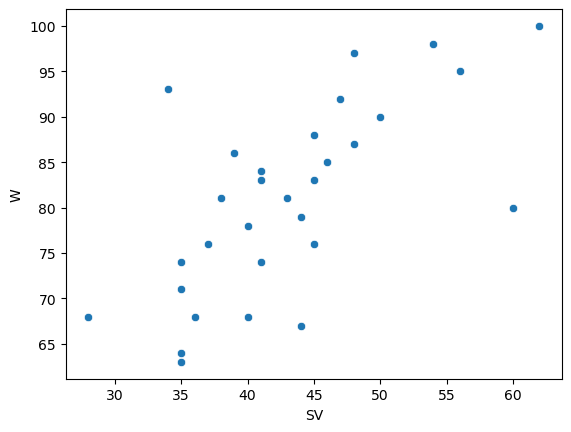

In [34]:
#  Relationship between SV and Win 

sns.scatterplot('SV','W',data=df)

In [ ]:
#Directly related.

<AxesSubplot:xlabel='E', ylabel='W'>

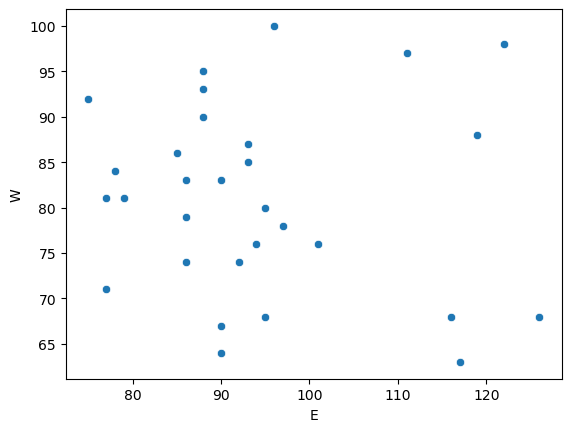

In [35]:
# Relationship between E and Win 

sns.scatterplot('E','W',data=df)

In [ ]:
#Weakly associated.

# Summary: Some features have a weak association with the target variable, while others have a strong inverse relationship.

In addition, there is multicollinearity, meaning some independent features are directly related to each other.

In [36]:
df.columns

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E', 'W'],
      dtype='object')

In [37]:
df.head(3)

R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  SV  \
0  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8  56   
1  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12  45   
2  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10  38   

    E   W  
0  88  95  
1  86  83  
2  79  81

<AxesSubplot:xlabel='R', ylabel='W'>

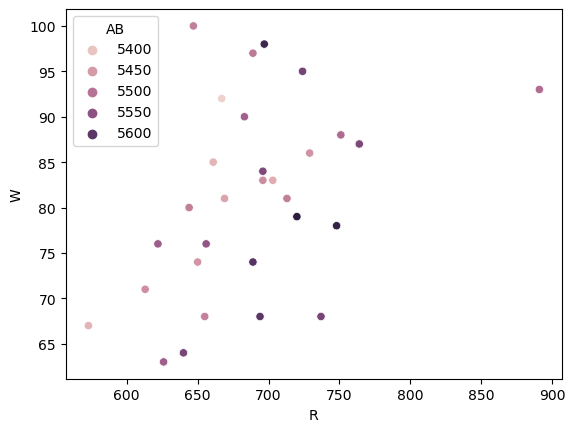

In [38]:
sns.scatterplot('R','W',hue='AB',data=df)  # At bats,  AB

In [39]:
df.head(50)

R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0   724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1   696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2   669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3   622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4   689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   
5   891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   10   
6   764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3    4   
7   713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   10   
8   644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   12   
9   748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   10   
10  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5    9   
11  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   13   
12  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   12   
13  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   12   
14  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   15   
15  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   15   
16  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   13   
17  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   21   
18  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1    7   
19  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2    8   
20  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   14   
21  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   13   
22  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   12   
23  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   10   
24  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1    7   
25  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   21   
26  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   18   
27  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   12   
28  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1    6   
29  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4    4   

    SV    E    W  
0   56   88   95  
1   45   86   83  
2   38   79   81  
3   37  101   76  
4   35   86   74  
5   34   88   93  
6   48   93   87  
7   43   77   81  
8   60   95   80  
9   40   97   78  
10  45  119   88  
11  39   85   86  
12  46   93   85  
13  45   94   76  
14  28  126   68  
15  62   96  100  
16  54  122   98  
17  48  111   97  
18  40  116   68  
19  35   90   64  
20  50   88   90  
21  41   90   83  
22  35   77   71  
23  44   90   67  
24  35  117   63  
25  47   75   92  
26  41   78   84  
27  44   86   79  
28  41   92   74  
29  36   95   68

# Distinct Values

In [40]:
for i in df.columns:
    df[i].nunique()
    print("unique values of feature ",i, '= ',df[i].nunique())

unique values of feature  R =  28
unique values of feature  AB =  29
unique values of feature  H =  29
unique values of feature  2B =  22
unique values of feature  3B =  23
unique values of feature  HR =  27
unique values of feature  BB =  29
unique values of feature  SO =  29
unique values of feature  SB =  27
unique values of feature  RA =  30
unique values of feature  ER =  30
unique values of feature  ERA =  30
unique values of feature  CG =  9
unique values of feature  SHO =  12
unique values of feature  SV =  20
unique values of feature  E =  21
unique values of feature  W =  24


In [41]:
df.CG.unique()

array([ 2, 11,  7,  3,  0,  1,  5,  6,  4], dtype=int64)

<AxesSubplot:xlabel='R', ylabel='W'>

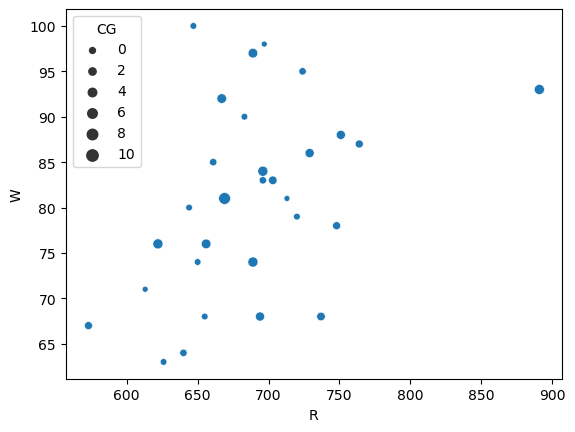

In [42]:
sns.scatterplot('R','W',size='CG',data=df)

<AxesSubplot:xlabel='CG', ylabel='W'>

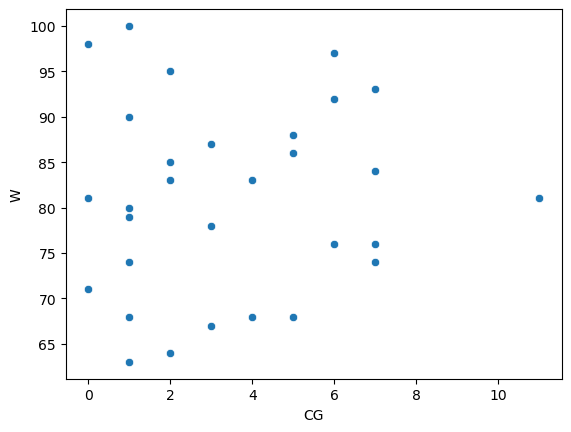

In [43]:
sns.scatterplot('CG','W',data=df)

In [9]:
#Complete Game is not related to WIN, as it is possible to play a complete game and still lose some matches
#A complete game is when a pitcher stays on the mound for his team for the whole game, no matter how many innings it has.

<AxesSubplot:xlabel='ER', ylabel='RA'>

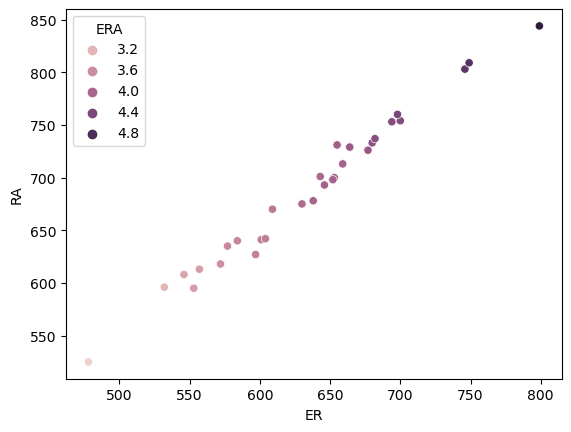

In [44]:
sns.scatterplot('ER', 'RA', hue='ERA',data=df)

In [10]:
#RA - Runs scored by opponents
#ER - Runs allowed that are not due to errors
#ERA - Average number of earned runs allowed per nine innings

#Earned runs are the main factor in ERA, which is the most common measure of a pitcher’s performance. When there are no errors or passed balls in an inning or a game, all the runs in that inning or game are earned runs.
#RA and ER seem to be the same thing, meaning RA - runs scored by opponents and ER - runs allowed without any errors.

# Identifying multicolinearity using VIF

In [45]:
v= df.drop('W', axis=1)
v.head(2)

R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  SV  \
0  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8  56   
1  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12  45   

    E  
0  88  
1  86

In [46]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(v)

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
VIF= pd.DataFrame()
VIF['features']=v.columns

In [49]:
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]

In [50]:
VIF

features          vif
0         R    11.522370
1        AB    13.311532
2         H    10.070668
3        2B     4.019297
4        3B     3.294146
5        HR    10.079902
6        BB     3.806098
7        SO     2.652401
8        SB     2.102684
9        RA   191.839155
10       ER  1680.387145
11      ERA  1222.722240
12       CG     3.059904
13      SHO     3.654331
14       SV     5.798850
15        E     2.186219

In [11]:
#Several features have a VIF higher than 5,
#Removing the feature ‘ER’

In [51]:
v= df.drop(['W','ER'], axis=1)

In [52]:
v.head(2)

R    AB     H   2B  3B   HR   BB    SO   SB   RA   ERA  CG  SHO  SV   E
0  724  5575  1497  300  42  139  383   973  104  641  3.73   2    8  56  88
1  696  5467  1349  277  44  156  439  1264   70  700  4.07   2   12  45  86

In [53]:
scaled=sc.fit_transform(v)

In [54]:
VIF2= pd.DataFrame()
VIF2['features']=v.columns

VIF2['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]

In [55]:
VIF2

features         vif
0         R   11.158733
1        AB    5.863764
2         H    9.628749
3        2B    3.786446
4        3B    3.293109
5        HR    9.057309
6        BB    3.791451
7        SO    2.607389
8        SB    1.849280
9        RA  122.133235
10      ERA  119.328698
11       CG    2.741188
12      SHO    3.410561
13       SV    3.203815
14        E    2.107345

In [ ]:
#Dropping the RA column

In [56]:
v= df.drop(['W','ER','RA'], axis=1)

In [57]:
scaled=sc.fit_transform(v)

In [58]:
VIF3= pd.DataFrame()
VIF3['features']=v.columns

VIF3['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]

In [59]:
VIF3

features        vif
0         R  10.987898
1        AB   4.399954
2         H   8.941874
3        2B   3.729413
4        3B   3.142717
5        HR   7.882841
6        BB   3.468244
7        SO   2.155496
8        SB   1.819823
9       ERA   4.951981
10       CG   2.723370
11      SHO   3.227759
12       SV   2.948133
13        E   2.040676

In [60]:
v.head(3)

R    AB     H   2B  3B   HR   BB    SO   SB   ERA  CG  SHO  SV   E
0  724  5575  1497  300  42  139  383   973  104  3.73   2    8  56  88
1  696  5467  1349  277  44  156  439  1264   70  4.07   2   12  45  86
2  669  5439  1395  303  29  141  533  1157   86  3.67  11   10  38  79

<AxesSubplot:>

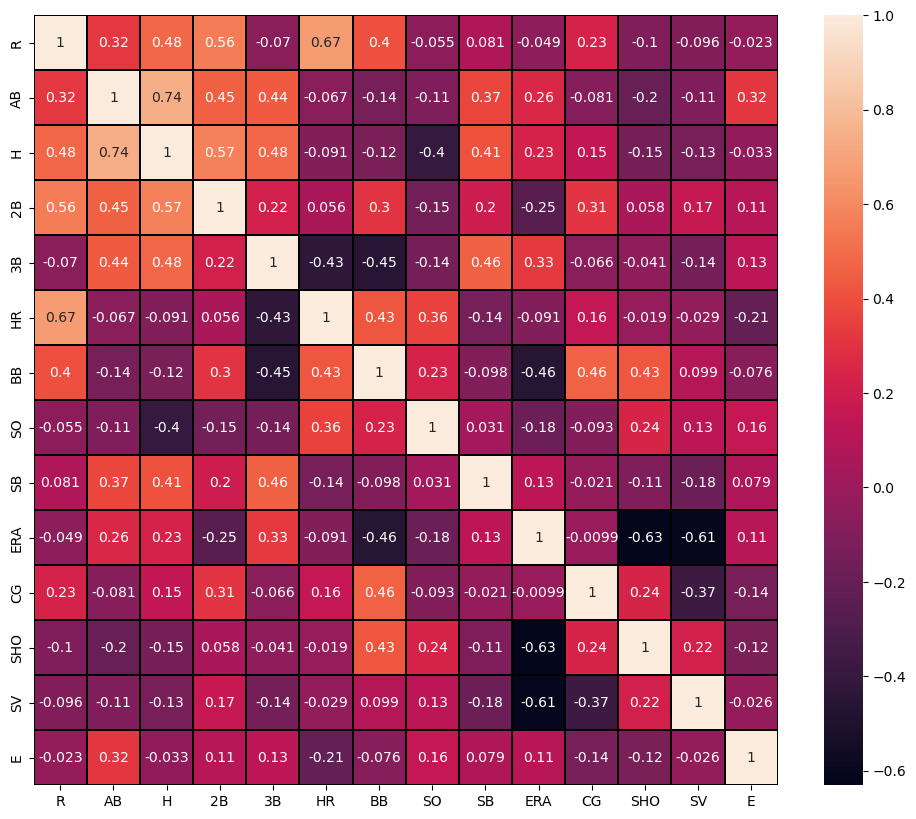

In [61]:
plt.figure(figsize=(12,10))
sns.heatmap(v.corr(), annot=True,linecolor='black', linewidths=.25)

In [ ]:
#All the features with strong correlation are now gone.

In [62]:
v.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

# The outliers

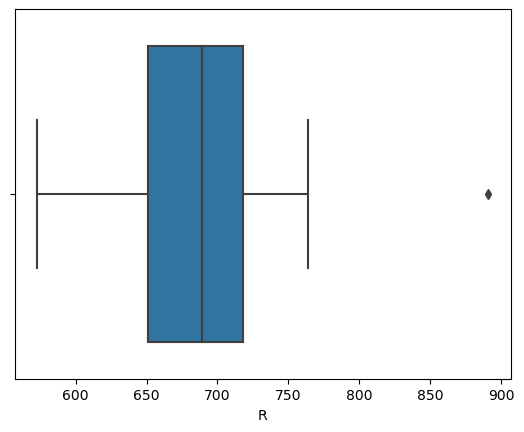

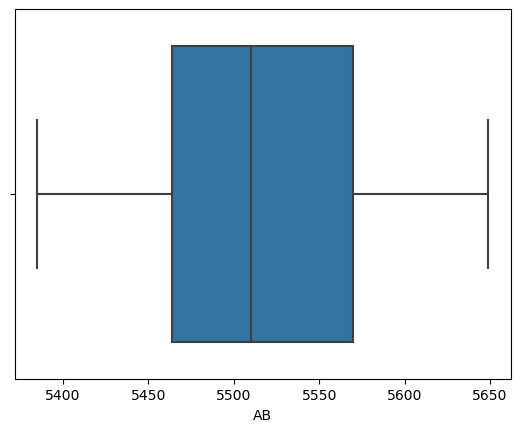

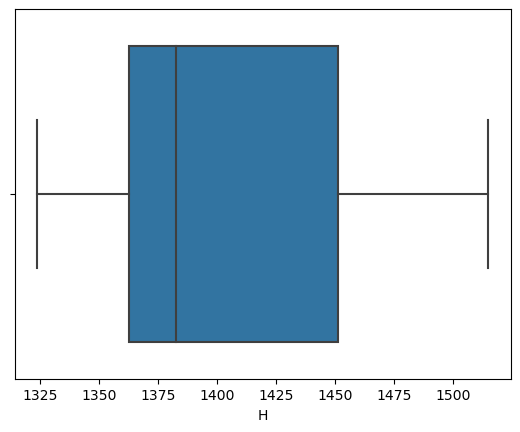

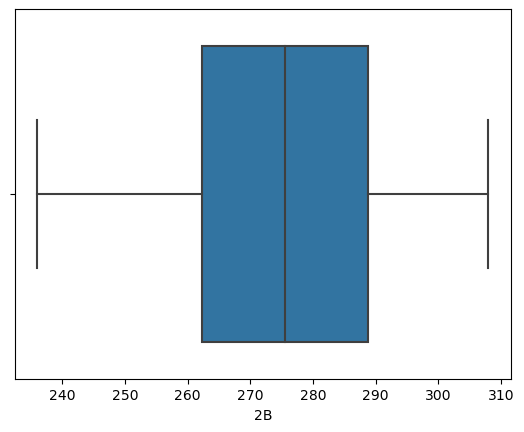

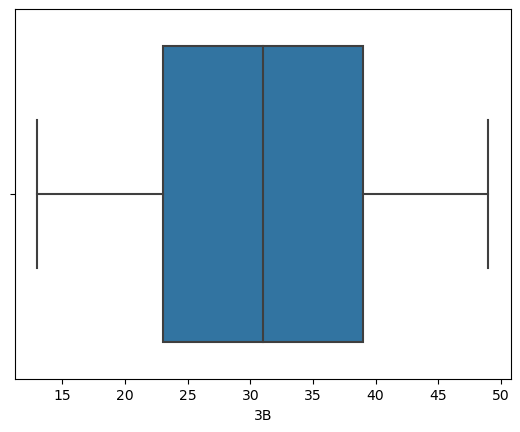

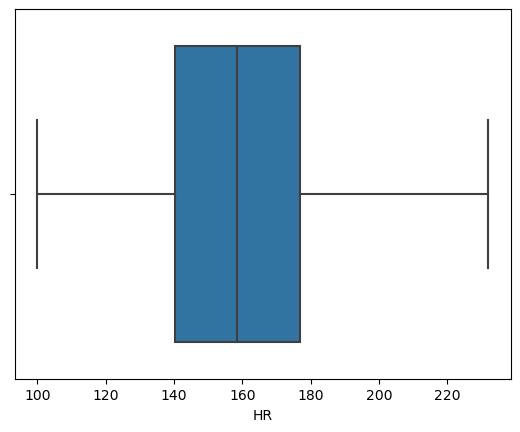

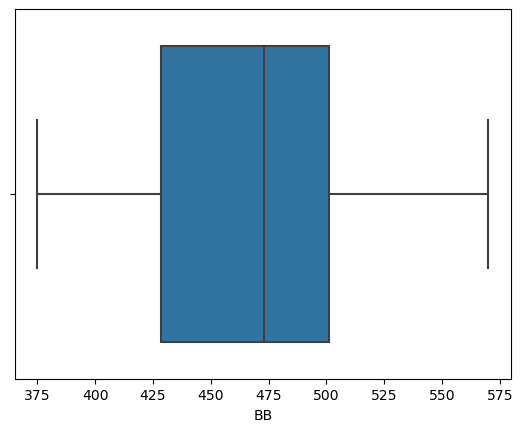

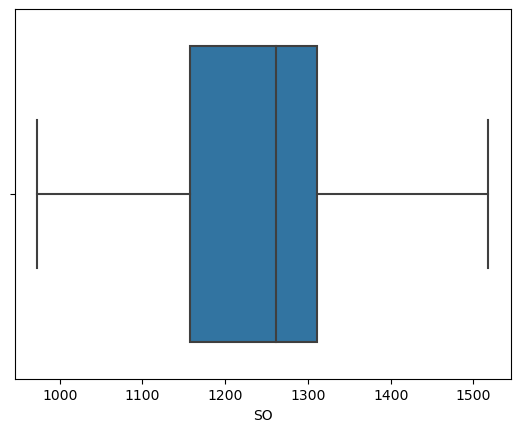

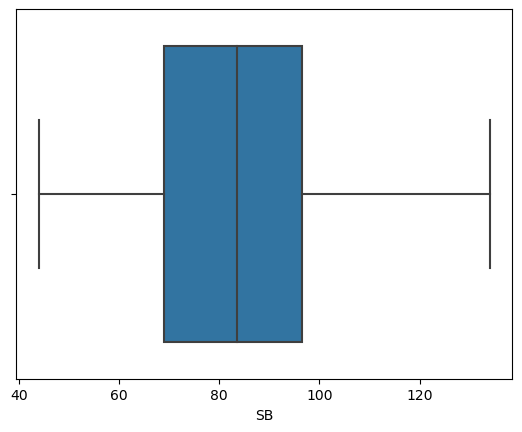

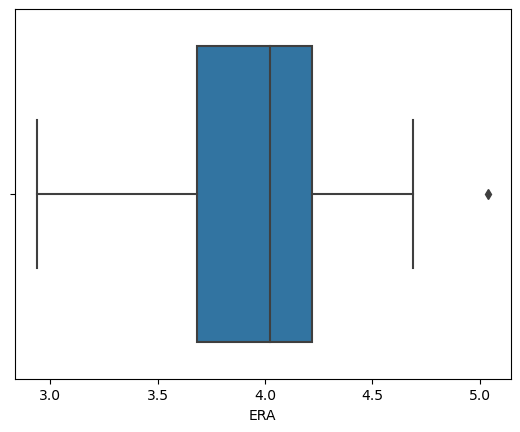

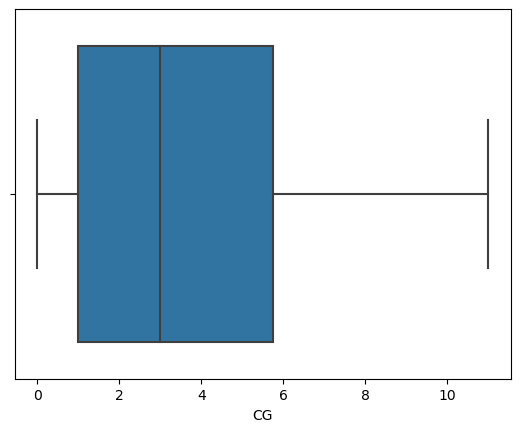

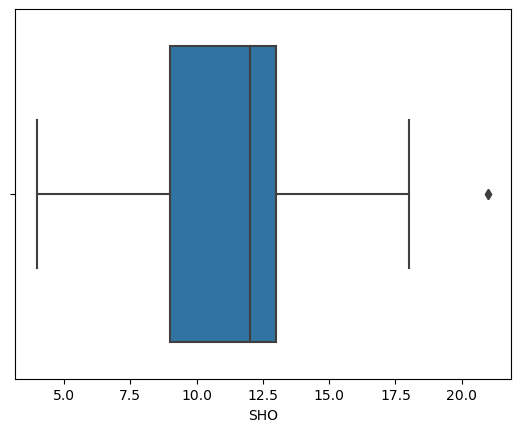

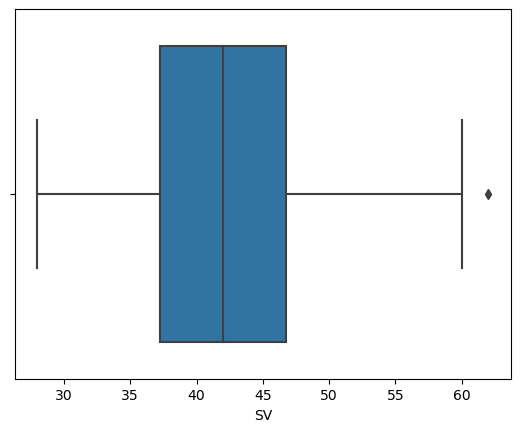

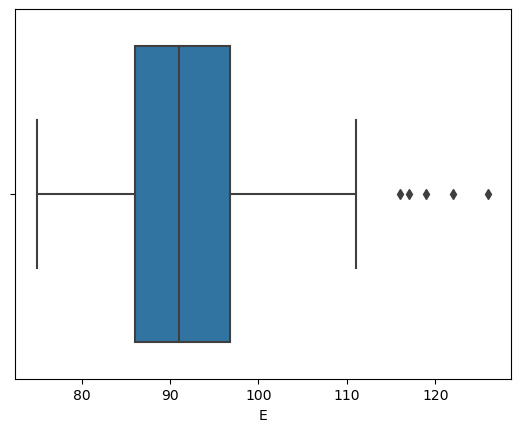

In [63]:
for i in v.columns:
    sns.boxplot(v[i])
    plt.show()

In [64]:
v.columns

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'ERA', 'CG', 'SHO',
       'SV', 'E'],
      dtype='object')

In [ ]:
#Outliers are among the more prominent features. Let's handle R, ERA, SHO, SV, and E.

In [65]:
IQR= df['R'].quantile(.75)-df['R'].quantile(.25)
IQR
upper= df['R'].quantile(.75) +( 1.5 * IQR)
upper

818.75

In [66]:
v['R']= np.where(v['R']>upper,upper,v['R'])

In [67]:
IQR= df['ERA'].quantile(.75)-df['ERA'].quantile(.25)
IQR
upper= df['ERA'].quantile(.75) +( 1.5 * IQR)
upper
v['ERA']= np.where(v['ERA']>upper,upper,v['ERA'])

In [68]:
IQR= df['SHO'].quantile(.75)-df['SHO'].quantile(.25)
IQR
upper= df['SHO'].quantile(.75) +( 1.5 * IQR)
upper
v['SHO']= np.where(v['SHO']>upper,upper,v['SHO'])

In [69]:
IQR= df['SV'].quantile(.75)-df['SV'].quantile(.25)
IQR
upper= df['SV'].quantile(.75) +( 1.5 * IQR)
upper
v['SV']= np.where(v['SV']>upper,upper,v['SV'])

In [70]:
IQR= df['E'].quantile(.75)-df['E'].quantile(.25)
IQR
upper= df['E'].quantile(.75) +( 1.5 * IQR)
upper
v['E']= np.where(v['E']>upper,upper,v['E'])

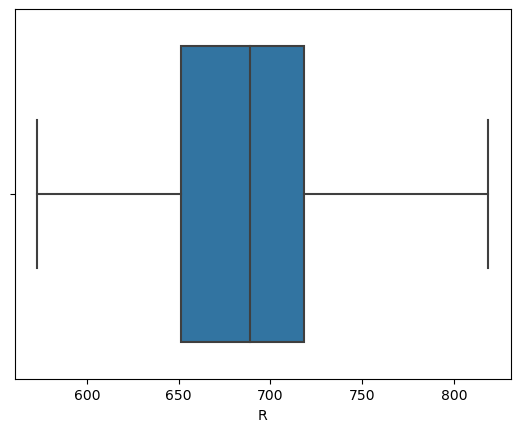

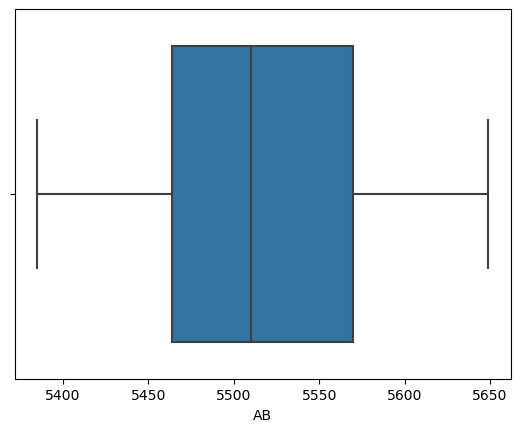

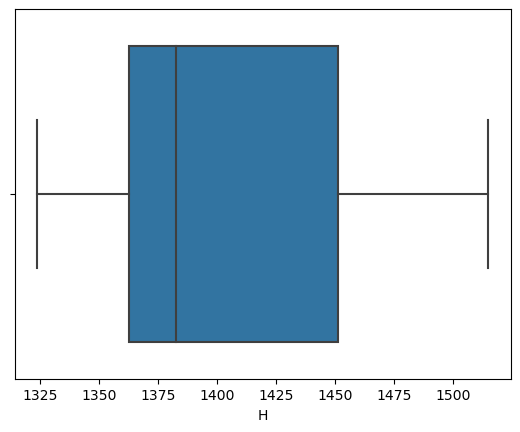

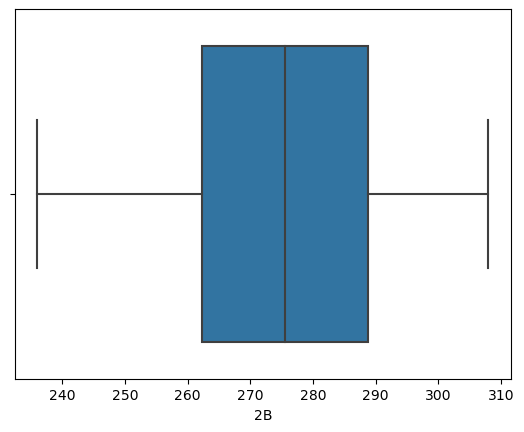

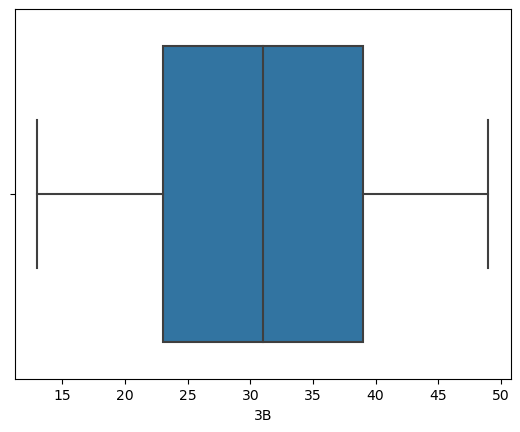

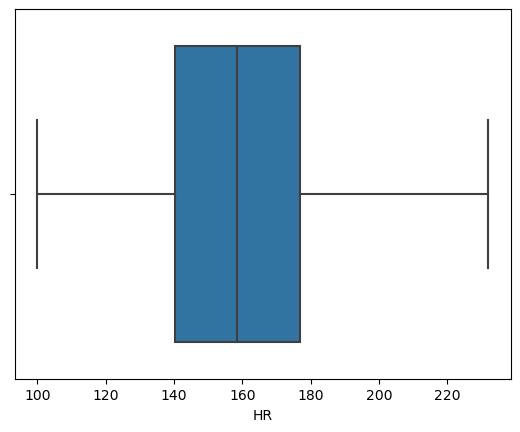

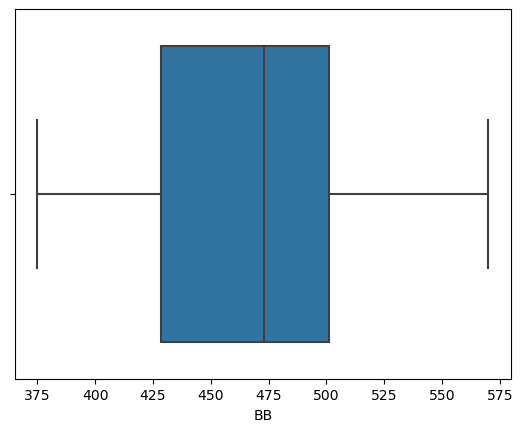

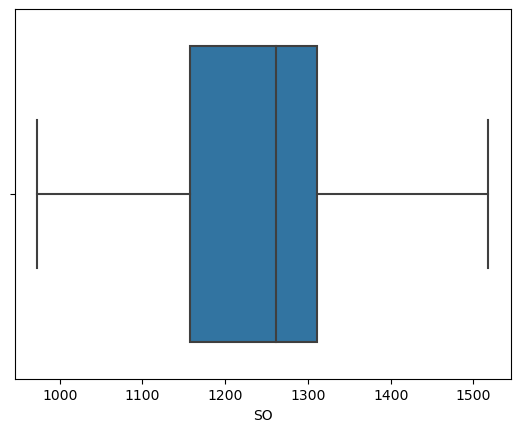

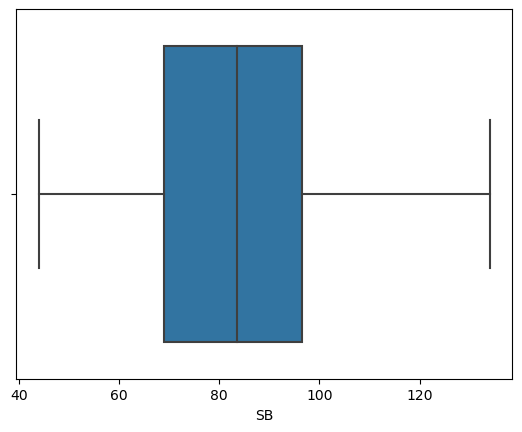

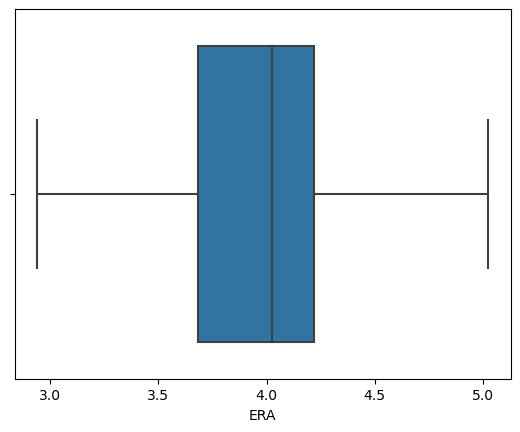

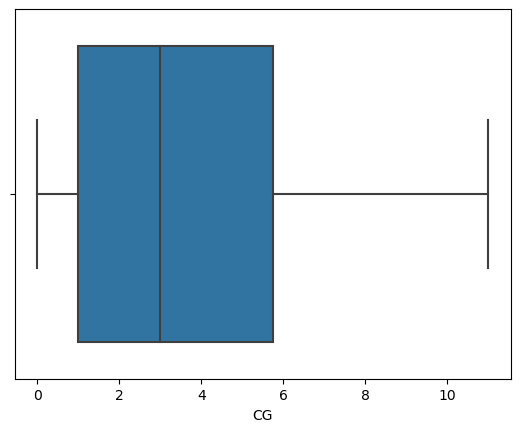

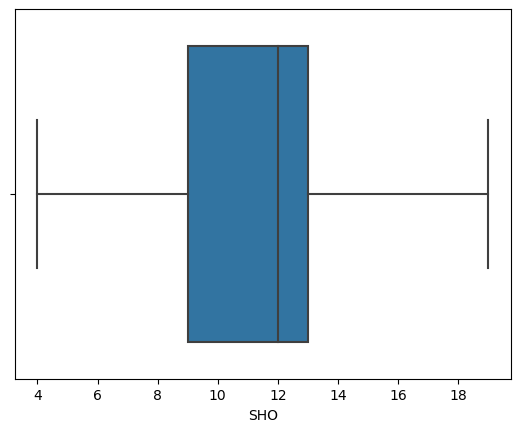

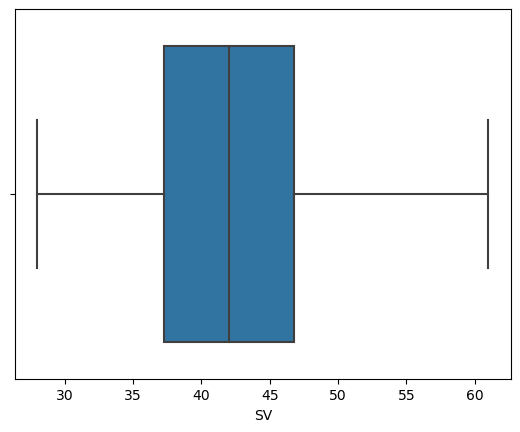

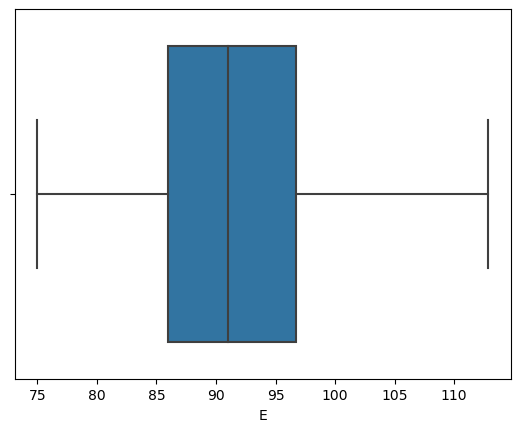

In [71]:
for i in v.columns:
    sns.boxplot(v[i])
    plt.show()

In [ ]:
#handled anomalies

In [72]:
v.skew()

R      0.284282
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
ERA    0.037969
CG     0.736845
SHO    0.218030
SV     0.612333
E      0.504019
dtype: float64

In [ ]:
# After dealing with outliers, skewness has also been eliminated.

# The transformation

In [73]:
from sklearn.preprocessing import power_transform
transformed=power_transform(v)

In [74]:
transformed=pd.DataFrame(transformed)
transformed.columns=v.columns

In [75]:
transformed.skew()

R      0.000000
AB     0.000000
H      0.000000
2B    -0.035315
3B    -0.072933
HR    -0.000065
BB    -0.007760
SO     0.041170
SB    -0.010455
ERA    0.001204
CG    -0.059785
SHO   -0.017889
SV     0.001270
E      0.032939
dtype: float64

In [76]:
transformed.head(2)

R   AB    H        2B        3B        HR        BB        SO        SB  \
0  0.0  0.0  0.0  1.477685  1.033103 -0.764626 -1.610915 -2.569896  0.939708   
1  0.0  0.0  0.0  0.084269  1.203320 -0.158581 -0.502749  0.134913 -0.539693   

        ERA        CG       SHO        SV         E  
0 -0.502797 -0.359844 -0.827928  1.564693 -0.357505  
1  0.261440 -0.359844  0.258244  0.361185 -0.560947

In [ ]:
#skewness is no longer present.

# The standardization

In [77]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(transformed)

# Distinguish between independent and dependent properties.

In [78]:
X= scaled

In [79]:
Y=df['W']

In [80]:
X.shape

(30, 14)

In [81]:
Y.shape

(30,)

# Applying Machine Learning

In [82]:
# As the output variable has continuous data and sales predictions, it is a regression problem.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

LR= LinearRegression()

In [83]:
# Finding the best random_state for the model during the train-test split

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.2)
    LR.fit(x_train,y_train)
    train_pred=LR.predict(x_train)
    test_pred=LR.predict(x_test)
    if round(r2_score(y_test,test_pred),2)==round(r2_score(y_train,train_pred),2):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('X'*50,'\n')

At random state  30 The model performance very well
At random state:  30
Test R2 score is:  0.84
Train R2 score is:  0.84
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  47 The model performance very well
At random state:  47
Test R2 score is:  0.85
Train R2 score is:  0.85
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  99 The model performance very well
At random state:  99
Test R2 score is:  0.85
Train R2 score is:  0.85
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  175 The model performance very well
At random state:  175
Test R2 score is:  0.86
Train R2 score is:  0.86
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 



In [84]:
# State selection: 175

x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=175,test_size=.2)
LR.fit(x_train,y_train)

LinearRegression()

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [88]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
XGB_model= XGBRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model]

In [89]:
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print('X' * 50, '\n\n')

mean_absolute_error of  LinearRegression() model 2.7264065961746673
mean_square_error of LinearRegression() model 13.319637960999827
R2 Score of LinearRegression() model 86.25266724208733
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Ridge() model 2.294706185531917
mean_square_error of Ridge() model 11.152294329870855
R2 Score of Ridge() model 88.48960447605072
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Lasso() model 2.851798496410254
mean_square_error of Lasso() model 9.180635618736224
R2 Score of Lasso() model 90.524573329286
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  DecisionTreeRegressor() model 8.166666666666666
mean_square_error of DecisionTreeRegressor() model 84.5
R2 Score of DecisionTreeRegressor() model 12.786697247706424
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  SVR() model 8.005345608904014
mean_square_error of SVR() model 91.123272106357

# Cross Validation

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
for i in model:
    print('mean_square of ',i, 'model',mean_squared_error(y_test,i.predict(x_test)))
    print("cross Validation score of ",i ," is ",cross_val_score(i,X,Y,cv=10, scoring='neg_mean_squared_error').mean())
    print('*'*50)

mean_square of  LinearRegression() model 13.319637960999827
cross Validation score of  LinearRegression()  is  -55.10832658669832
**************************************************
mean_square of  Ridge() model 11.152294329870855
cross Validation score of  Ridge()  is  -47.703110230419824
**************************************************
mean_square of  Lasso() model 9.180635618736224
cross Validation score of  Lasso()  is  -38.00120143901657
**************************************************
mean_square of  DecisionTreeRegressor() model 84.5
cross Validation score of  DecisionTreeRegressor()  is  -101.73333333333333
**************************************************
mean_square of  SVR() model 91.1232721063577
cross Validation score of  SVR()  is  -101.43654219683
**************************************************
mean_square of  KNeighborsRegressor() model 55.53999999999997
cross Validation score of  KNeighborsRegressor()  is  -80.90266666666668
*************************************

In [92]:
for i in model:
    print('Root mean_square of ',i, 'model',np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
    score=cross_val_score(i,X,Y,cv=10, scoring='neg_mean_squared_error').mean()
    print("cross Validation score of root mean square ",i ," is ",np.sqrt(-score))
    print('*'*50)

Root mean_square of  LinearRegression() model 3.649607918804406
cross Validation score of root mean square  LinearRegression()  is  7.42349827148214
**************************************************
Root mean_square of  Ridge() model 3.3395051025370295
cross Validation score of root mean square  Ridge()  is  6.906743822556315
**************************************************
Root mean_square of  Lasso() model 3.029956372414663
cross Validation score of root mean square  Lasso()  is  6.164511451771062
**************************************************
Root mean_square of  DecisionTreeRegressor() model 9.192388155425117
cross Validation score of root mean square  DecisionTreeRegressor()  is  10.389096848780136
**************************************************
Root mean_square of  SVR() model 9.545851041492199
cross Validation score of root mean square  SVR()  is  10.071570989514496
**************************************************
Root mean_square of  KNeighborsRegressor() model 7.45

# XGBRegressor Hypertuning

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
params= {"learning_rate"    : [0.01,.05,.1,.2,.3,.5 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.01, 0.05,0.1, 0.2 , 0.3],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [95]:
GCV= GridSearchCV(XGB_model,params,cv=5,scoring='neg_mean_squared_error', n_jobs=-1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=N

In [97]:
GCV.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.01,
 'learning_rate': 0.2,
 'max_depth': 4,
 'min_child_weight': 3}

In [98]:
GCV_pred=GCV.best_estimator_.predict(x_test)
mean_squared_error(y_test,GCV_pred)

76.23911029390486

In [12]:
#error has dropped from 81.98 to 76.

# Model saving in pickle format

In [99]:
import joblib
joblib.dump(GCV.best_estimator_,"Baseball.pkl")

['Baseball.pkl']